In [2]:
%matplotlib inline
import time
import random
import datetime
from collections import OrderedDict
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from tqdm import tqdm_notebook
from xgboost import XGBRegressor, XGBClassifier
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.base import BaseEstimator, RegressorMixin

In [ ]:
df = pd.read_csv('datasets/mushrooms.txt', sep=',', header=None)

In [115]:
le = LabelEncoder()
reg = XGBRegressor(n_estimators=300)
clf = XGBClassifier(n_estimators=300)
lr = linear_model.LinearRegression()

In [116]:
X = {}
for col in df.iloc[:, 1:]:
    X[col] = le.fit_transform(df[col])
X = pd.DataFrame(X)
X['action'] = np.nan
X['reward'] = np.nan
X['label'] = df.iloc[:, 0]

In [ ]:
history = pd.DataFrame()
log = []
acc_regret = 0
start_epsilon = 10
end_epsilon = 100
first_time = True

for i in range(50000):
    sample = X.sample(n=1)
    action = None
    epsilon = lr.fit([[start_epsilon], [end_epsilon]], [1.0, 0.0]).predict(i)
    
    if random.random() < epsilon[0]:
        action = random.choice((0, 1))
    elif i % 100 == 0 or first_time:
        first_time = False
        X_train = history.iloc[-10000:].drop(['label', 'reward'], axis=1)
        y_train = history.iloc[-10000:]['reward']
        reg.fit(X_train, y_train)
    
    if action is None:
        sample['action'] = 0
        pass_reward = reg.predict(sample.drop(['label', 'reward'], axis=1))
        
        sample['action'] = 1
        eat_reward = reg.predict(sample.drop(['label', 'reward'], axis=1))

        action = 0 if pass_reward >= eat_reward else 1
    
    label = sample['label'].values[0]
    oracle = 0 if label == 'p' else 5

    reward = 0
    if action == 1:
        if label == 'e':
            reward = 5
        else:
            reward = random.choice((-35, 5))
            
    sample['action'] = action
    sample['reward'] = reward
    
    regret = oracle - reward
    acc_regret += regret
    
    history = history.append(sample)
    
    log.append((i, action, reward, oracle, regret, acc_regret))
    print(i, action, reward, oracle, regret, acc_regret)

0 0 0 5 5 5
1 1 -35 0 35 40
2 0 0 5 5 45
3 0 0 5 5 50
4 0 0 0 0 50
5 0 0 5 5 55
6 0 0 5 5 60
7 1 5 5 0 60
8 0 0 0 0 60
9 1 -35 0 35 95
10 1 5 0 -5 90
11 1 5 0 -5 85
12 1 -35 0 35 120
13 0 0 5 5 125
14 1 5 5 0 125
15 0 0 5 5 130
16 1 5 0 -5 125
17 0 0 5 5 130
18 1 5 5 0 130
19 0 0 5 5 135
20 1 5 0 -5 130
21 1 5 5 0 130
22 1 -35 0 35 165
23 1 5 5 0 165
24 0 0 0 0 165
25 1 5 0 -5 160
26 1 5 5 0 160
27 1 5 5 0 160
28 1 -35 0 35 195
29 0 0 5 5 200
30 1 -35 0 35 235
31 1 5 0 -5 230
32 0 0 0 0 230
33 1 5 5 0 230
34 1 -35 0 35 265
35 1 5 5 0 265
36 1 5 0 -5 260
37 1 -35 0 35 295
38 0 0 5 5 300
39 1 5 0 -5 295
40 1 5 0 -5 290
41 0 0 0 0 290
42 1 5 5 0 290
43 1 -35 0 35 325
44 1 5 5 0 325
45 1 5 5 0 325
46 1 5 5 0 325
47 1 -35 0 35 360
48 1 5 5 0 360
49 1 5 0 -5 355
50 1 5 5 0 355
51 0 0 0 0 355
52 0 0 5 5 360
53 1 5 5 0 360
54 0 0 0 0 360
55 0 0 5 5 365
56 1 5 5 0 365
57 1 -35 0 35 400
58 1 5 0 -5 395
59 1 5 0 -5 390
60 1 5 5 0 390
61 0 0 0 0 390
62 0 0 0 0 390
63 1 5 5 0 390
64 1 5 5 0 390
65 

543 1 5 5 0 855
544 1 5 5 0 855
545 0 0 5 5 860
546 0 0 0 0 860
547 0 0 0 0 860
548 1 5 5 0 860
549 0 0 0 0 860
550 0 0 0 0 860
551 0 0 0 0 860
552 1 5 5 0 860
553 1 5 5 0 860
554 0 0 0 0 860
555 1 5 5 0 860
556 0 0 0 0 860
557 0 0 0 0 860
558 1 5 5 0 860
559 1 5 5 0 860
560 1 5 5 0 860
561 0 0 0 0 860
562 1 5 5 0 860
563 1 5 5 0 860
564 1 5 5 0 860
565 1 5 5 0 860
566 0 0 5 5 865
567 1 5 5 0 865
568 0 0 0 0 865
569 1 5 5 0 865
570 1 5 5 0 865
571 1 5 5 0 865
572 1 5 5 0 865
573 1 5 5 0 865
574 0 0 0 0 865
575 0 0 0 0 865
576 1 5 0 -5 860
577 1 5 5 0 860
578 0 0 5 5 865
579 0 0 0 0 865
580 0 0 5 5 870
581 0 0 0 0 870
582 0 0 5 5 875
583 1 5 0 -5 870
584 0 0 0 0 870
585 0 0 0 0 870
586 1 5 5 0 870
587 1 5 5 0 870
588 0 0 0 0 870
589 0 0 0 0 870
590 0 0 0 0 870
591 1 5 0 -5 865
592 0 0 0 0 865
593 1 5 5 0 865
594 0 0 0 0 865
595 1 5 5 0 865
596 0 0 0 0 865
597 0 0 0 0 865
598 1 -35 0 35 900
599 0 0 0 0 900
600 0 0 0 0 900
601 0 0 0 0 900
602 1 5 5 0 900
603 1 5 5 0 900
604 0 0 0 0 900
60

1053 1 5 5 0 1365
1054 1 5 5 0 1365
1055 1 5 5 0 1365
1056 1 5 5 0 1365
1057 0 0 5 5 1370
1058 0 0 0 0 1370
1059 0 0 0 0 1370
1060 0 0 0 0 1370
1061 0 0 0 0 1370
1062 1 5 5 0 1370
1063 1 5 5 0 1370
1064 1 5 5 0 1370
1065 0 0 0 0 1370
1066 1 5 5 0 1370
1067 1 5 5 0 1370
1068 1 5 5 0 1370
1069 1 -35 0 35 1405
1070 0 0 0 0 1405
1071 1 5 5 0 1405
1072 0 0 0 0 1405
1073 0 0 0 0 1405
1074 0 0 0 0 1405
1075 1 5 5 0 1405
1076 0 0 0 0 1405
1077 0 0 0 0 1405
1078 1 5 5 0 1405
1079 0 0 0 0 1405
1080 0 0 0 0 1405
1081 0 0 0 0 1405
1082 1 5 5 0 1405
1083 0 0 5 5 1410
1084 1 5 5 0 1410
1085 1 5 5 0 1410
1086 0 0 0 0 1410
1087 1 5 5 0 1410
1088 1 5 5 0 1410
1089 1 5 5 0 1410
1090 0 0 0 0 1410
1091 0 0 0 0 1410
1092 1 5 5 0 1410
1093 0 0 0 0 1410
1094 0 0 0 0 1410
1095 0 0 0 0 1410
1096 0 0 0 0 1410
1097 0 0 0 0 1410
1098 0 0 0 0 1410
1099 1 5 5 0 1410
1100 0 0 0 0 1410
1101 0 0 0 0 1410
1102 0 0 0 0 1410
1103 1 5 5 0 1410
1104 0 0 0 0 1410
1105 1 5 5 0 1410
1106 1 5 5 0 1410
1107 1 5 5 0 1410
1108 1 

1542 1 5 5 0 1455
1543 0 0 0 0 1455
1544 1 5 5 0 1455
1545 0 0 0 0 1455
1546 1 5 5 0 1455
1547 0 0 0 0 1455
1548 1 5 5 0 1455
1549 1 5 5 0 1455
1550 0 0 0 0 1455
1551 0 0 0 0 1455
1552 0 0 0 0 1455
1553 1 5 5 0 1455
1554 1 5 5 0 1455
1555 1 5 5 0 1455
1556 0 0 0 0 1455
1557 0 0 0 0 1455
1558 0 0 0 0 1455
1559 1 5 5 0 1455
1560 1 5 5 0 1455
1561 1 5 5 0 1455
1562 1 5 5 0 1455
1563 0 0 0 0 1455
1564 1 5 5 0 1455
1565 1 5 5 0 1455
1566 0 0 0 0 1455
1567 1 5 0 -5 1450
1568 0 0 0 0 1450
1569 0 0 0 0 1450
1570 1 5 5 0 1450
1571 0 0 0 0 1450
1572 1 5 5 0 1450
1573 1 5 5 0 1450
1574 1 5 5 0 1450
1575 0 0 0 0 1450
1576 1 5 5 0 1450
1577 0 0 0 0 1450
1578 0 0 0 0 1450
1579 0 0 0 0 1450
1580 1 5 5 0 1450
1581 1 5 5 0 1450
1582 0 0 0 0 1450
1583 0 0 0 0 1450
1584 0 0 0 0 1450
1585 1 5 5 0 1450
1586 1 5 5 0 1450
1587 0 0 0 0 1450
1588 1 5 5 0 1450
1589 1 5 5 0 1450
1590 1 5 5 0 1450
1591 0 0 0 0 1450
1592 0 0 0 0 1450
1593 0 0 0 0 1450
1594 1 5 5 0 1450
1595 0 0 0 0 1450
1596 0 0 0 0 1450
1597 1 5 

2000 0 0 0 0 1500
2001 1 5 5 0 1500
2002 1 5 5 0 1500
2003 0 0 0 0 1500
2004 0 0 0 0 1500
2005 0 0 0 0 1500
2006 0 0 0 0 1500
2007 0 0 0 0 1500
2008 0 0 0 0 1500
2009 1 5 5 0 1500
2010 0 0 0 0 1500
2011 1 5 5 0 1500
2012 1 5 5 0 1500
2013 1 5 5 0 1500
2014 1 5 5 0 1500
2015 1 5 5 0 1500
2016 0 0 0 0 1500
2017 0 0 0 0 1500
2018 1 5 5 0 1500
2019 0 0 0 0 1500
2020 0 0 0 0 1500
2021 0 0 0 0 1500
2022 0 0 0 0 1500
2023 0 0 0 0 1500
2024 0 0 0 0 1500
2025 0 0 0 0 1500
2026 0 0 0 0 1500
2027 1 5 5 0 1500
2028 0 0 0 0 1500
2029 1 5 5 0 1500
2030 1 5 5 0 1500
2031 1 5 5 0 1500
2032 1 5 5 0 1500
2033 0 0 0 0 1500
2034 1 5 5 0 1500
2035 0 0 0 0 1500
2036 0 0 0 0 1500
2037 0 0 0 0 1500
2038 1 5 5 0 1500
2039 0 0 0 0 1500
2040 1 5 5 0 1500
2041 0 0 0 0 1500
2042 0 0 0 0 1500
2043 0 0 0 0 1500
2044 0 0 0 0 1500
2045 0 0 0 0 1500
2046 1 5 5 0 1500
2047 0 0 0 0 1500
2048 0 0 0 0 1500
2049 1 5 5 0 1500
2050 1 5 5 0 1500
2051 0 0 0 0 1500
2052 1 5 5 0 1500
2053 0 0 0 0 1500
2054 0 0 0 0 1500
2055 0 0 0

2484 1 5 5 0 1545
2485 0 0 0 0 1545
2486 0 0 0 0 1545
2487 0 0 0 0 1545
2488 0 0 0 0 1545
2489 0 0 0 0 1545
2490 0 0 0 0 1545
2491 0 0 0 0 1545
2492 0 0 0 0 1545
2493 0 0 0 0 1545
2494 1 5 5 0 1545
2495 0 0 0 0 1545
2496 0 0 0 0 1545
2497 0 0 0 0 1545
2498 1 5 5 0 1545
2499 1 5 5 0 1545
2500 1 5 5 0 1545
2501 0 0 0 0 1545
2502 0 0 0 0 1545
2503 1 5 5 0 1545
2504 0 0 0 0 1545
2505 1 5 5 0 1545
2506 0 0 0 0 1545
2507 1 5 5 0 1545
2508 0 0 0 0 1545
2509 0 0 0 0 1545
2510 1 5 5 0 1545
2511 1 5 5 0 1545
2512 0 0 0 0 1545
2513 0 0 0 0 1545
2514 0 0 0 0 1545
2515 1 5 5 0 1545
2516 1 5 5 0 1545
2517 1 5 5 0 1545
2518 0 0 0 0 1545
2519 0 0 0 0 1545
2520 0 0 0 0 1545
2521 1 5 5 0 1545
2522 0 0 0 0 1545
2523 0 0 0 0 1545
2524 1 5 5 0 1545
2525 1 5 5 0 1545
2526 0 0 0 0 1545
2527 0 0 0 0 1545
2528 0 0 0 0 1545
2529 1 5 5 0 1545
2530 1 5 5 0 1545
2531 1 5 5 0 1545
2532 1 5 5 0 1545
2533 1 5 5 0 1545
2534 0 0 0 0 1545
2535 1 5 5 0 1545
2536 0 0 0 0 1545
2537 1 5 5 0 1545
2538 1 5 5 0 1545
2539 0 0 0

2942 1 5 5 0 1580
2943 1 5 5 0 1580
2944 1 5 5 0 1580
2945 0 0 0 0 1580
2946 1 5 5 0 1580
2947 1 5 5 0 1580
2948 1 5 5 0 1580
2949 1 5 5 0 1580
2950 1 5 5 0 1580
2951 1 5 5 0 1580
2952 0 0 0 0 1580
2953 1 5 5 0 1580
2954 1 5 5 0 1580
2955 1 5 5 0 1580
2956 0 0 0 0 1580
2957 1 5 5 0 1580
2958 1 5 5 0 1580
2959 1 5 5 0 1580
2960 0 0 0 0 1580
2961 0 0 0 0 1580
2962 0 0 0 0 1580
2963 0 0 0 0 1580
2964 1 5 5 0 1580
2965 1 5 5 0 1580
2966 1 5 5 0 1580
2967 0 0 0 0 1580
2968 1 5 5 0 1580
2969 0 0 0 0 1580
2970 0 0 0 0 1580
2971 0 0 0 0 1580
2972 0 0 0 0 1580
2973 1 5 5 0 1580
2974 0 0 0 0 1580
2975 1 5 5 0 1580
2976 1 5 5 0 1580
2977 1 5 5 0 1580
2978 1 5 5 0 1580
2979 1 5 5 0 1580
2980 1 5 5 0 1580
2981 0 0 0 0 1580
2982 0 0 0 0 1580
2983 0 0 0 0 1580
2984 1 5 5 0 1580
2985 1 5 5 0 1580
2986 1 5 5 0 1580
2987 1 5 5 0 1580
2988 1 5 5 0 1580
2989 0 0 0 0 1580
2990 1 5 5 0 1580
2991 0 0 0 0 1580
2992 1 5 5 0 1580
2993 0 0 0 0 1580
2994 1 5 5 0 1580
2995 1 5 5 0 1580
2996 1 5 5 0 1580
2997 1 5 5

3400 1 5 5 0 1665
3401 1 5 5 0 1665
3402 0 0 0 0 1665
3403 1 5 5 0 1665
3404 0 0 0 0 1665
3405 0 0 0 0 1665
3406 0 0 0 0 1665
3407 1 5 5 0 1665
3408 0 0 0 0 1665
3409 1 5 5 0 1665
3410 0 0 0 0 1665
3411 1 5 5 0 1665
3412 0 0 0 0 1665
3413 0 0 0 0 1665
3414 0 0 0 0 1665
3415 1 -35 0 35 1700
3416 1 5 5 0 1700
3417 0 0 0 0 1700
3418 0 0 0 0 1700
3419 1 5 5 0 1700
3420 0 0 0 0 1700
3421 0 0 0 0 1700
3422 0 0 0 0 1700
3423 0 0 0 0 1700
3424 1 5 5 0 1700
3425 0 0 0 0 1700
3426 0 0 0 0 1700
3427 0 0 0 0 1700
3428 0 0 0 0 1700
3429 1 5 5 0 1700
3430 1 5 5 0 1700
3431 0 0 0 0 1700
3432 0 0 0 0 1700
3433 0 0 0 0 1700
3434 0 0 0 0 1700
3435 1 5 5 0 1700
3436 1 5 5 0 1700
3437 1 5 5 0 1700
3438 0 0 0 0 1700
3439 1 5 5 0 1700
3440 0 0 0 0 1700
3441 0 0 0 0 1700
3442 0 0 0 0 1700
3443 1 5 5 0 1700
3444 0 0 0 0 1700
3445 1 5 5 0 1700
3446 1 5 5 0 1700
3447 0 0 0 0 1700
3448 1 5 5 0 1700
3449 0 0 0 0 1700
3450 1 5 5 0 1700
3451 1 5 5 0 1700
3452 0 0 0 0 1700
3453 1 5 5 0 1700
3454 1 5 5 0 1700
3455 1 

3883 0 0 0 0 1710
3884 1 5 5 0 1710
3885 0 0 0 0 1710
3886 0 0 0 0 1710
3887 1 5 5 0 1710
3888 0 0 0 0 1710
3889 1 5 5 0 1710
3890 0 0 0 0 1710
3891 0 0 0 0 1710
3892 0 0 0 0 1710
3893 1 5 5 0 1710
3894 1 5 5 0 1710
3895 0 0 0 0 1710
3896 0 0 0 0 1710
3897 0 0 0 0 1710
3898 1 5 5 0 1710
3899 1 5 5 0 1710
3900 1 5 5 0 1710
3901 0 0 0 0 1710
3902 0 0 0 0 1710
3903 0 0 0 0 1710
3904 0 0 0 0 1710
3905 1 5 5 0 1710
3906 1 5 5 0 1710
3907 1 5 5 0 1710
3908 0 0 0 0 1710
3909 1 5 5 0 1710
3910 0 0 0 0 1710
3911 0 0 0 0 1710
3912 1 5 5 0 1710
3913 0 0 0 0 1710
3914 1 5 5 0 1710
3915 0 0 0 0 1710
3916 1 5 5 0 1710
3917 1 5 5 0 1710
3918 0 0 0 0 1710
3919 1 5 5 0 1710
3920 1 5 5 0 1710
3921 1 5 5 0 1710
3922 0 0 0 0 1710
3923 1 5 5 0 1710
3924 1 5 5 0 1710
3925 0 0 0 0 1710
3926 0 0 0 0 1710
3927 1 5 5 0 1710
3928 0 0 0 0 1710
3929 1 5 5 0 1710
3930 1 5 5 0 1710
3931 0 0 0 0 1710
3932 1 5 5 0 1710
3933 1 5 5 0 1710
3934 1 5 5 0 1710
3935 1 5 5 0 1710
3936 0 0 0 0 1710
3937 0 0 0 0 1710
3938 1 5 5

4342 1 5 5 0 1735
4343 1 5 5 0 1735
4344 1 5 5 0 1735
4345 0 0 0 0 1735
4346 1 5 5 0 1735
4347 1 5 5 0 1735
4348 1 5 5 0 1735
4349 0 0 0 0 1735
4350 0 0 0 0 1735
4351 1 5 5 0 1735
4352 1 5 5 0 1735
4353 1 5 5 0 1735
4354 0 0 0 0 1735
4355 1 5 5 0 1735
4356 0 0 0 0 1735
4357 0 0 0 0 1735
4358 1 5 5 0 1735
4359 1 5 5 0 1735
4360 0 0 0 0 1735
4361 1 5 5 0 1735
4362 1 5 5 0 1735
4363 0 0 0 0 1735
4364 1 5 5 0 1735
4365 1 5 5 0 1735
4366 0 0 0 0 1735
4367 0 0 0 0 1735
4368 0 0 0 0 1735
4369 0 0 0 0 1735
4370 1 5 5 0 1735
4371 0 0 0 0 1735
4372 0 0 0 0 1735
4373 0 0 0 0 1735
4374 1 5 5 0 1735
4375 1 5 5 0 1735
4376 1 5 5 0 1735
4377 0 0 0 0 1735
4378 1 5 5 0 1735
4379 0 0 0 0 1735
4380 0 0 0 0 1735
4381 0 0 0 0 1735
4382 0 0 0 0 1735
4383 1 5 5 0 1735
4384 1 5 5 0 1735
4385 1 5 5 0 1735
4386 1 5 5 0 1735
4387 0 0 0 0 1735
4388 1 5 5 0 1735
4389 1 5 5 0 1735
4390 0 0 0 0 1735
4391 0 0 0 0 1735
4392 1 5 5 0 1735
4393 1 5 5 0 1735
4394 0 0 0 0 1735
4395 1 5 5 0 1735
4396 1 5 5 0 1735
4397 1 5 5

4800 1 5 5 0 1735
4801 1 5 5 0 1735
4802 0 0 0 0 1735
4803 0 0 0 0 1735
4804 0 0 0 0 1735
4805 0 0 0 0 1735
4806 0 0 0 0 1735
4807 0 0 0 0 1735
4808 0 0 0 0 1735
4809 0 0 0 0 1735
4810 1 5 5 0 1735
4811 1 5 5 0 1735
4812 1 5 5 0 1735
4813 1 5 5 0 1735
4814 0 0 0 0 1735
4815 0 0 0 0 1735
4816 1 5 5 0 1735
4817 1 5 5 0 1735
4818 1 5 5 0 1735
4819 1 5 5 0 1735
4820 1 5 5 0 1735
4821 1 5 5 0 1735
4822 1 5 5 0 1735
4823 0 0 0 0 1735
4824 1 5 5 0 1735
4825 0 0 0 0 1735
4826 0 0 0 0 1735
4827 0 0 0 0 1735
4828 1 5 5 0 1735
4829 0 0 0 0 1735
4830 0 0 0 0 1735
4831 1 5 5 0 1735
4832 0 0 0 0 1735
4833 0 0 0 0 1735
4834 1 5 5 0 1735
4835 0 0 0 0 1735
4836 0 0 0 0 1735
4837 0 0 0 0 1735
4838 0 0 0 0 1735
4839 1 5 5 0 1735
4840 0 0 0 0 1735
4841 0 0 0 0 1735
4842 1 5 5 0 1735
4843 1 5 5 0 1735
4844 0 0 0 0 1735
4845 0 0 0 0 1735
4846 1 5 5 0 1735
4847 1 5 5 0 1735
4848 1 5 5 0 1735
4849 0 0 0 0 1735
4850 0 0 0 0 1735
4851 1 5 5 0 1735
4852 1 5 5 0 1735
4853 0 0 0 0 1735
4854 1 5 5 0 1735
4855 1 5 5

5284 0 0 0 0 1770
5285 1 5 5 0 1770
5286 0 0 0 0 1770
5287 0 0 0 0 1770
5288 1 5 5 0 1770
5289 0 0 0 0 1770
5290 0 0 0 0 1770
5291 1 5 5 0 1770
5292 0 0 0 0 1770
5293 0 0 0 0 1770
5294 0 0 0 0 1770
5295 1 5 5 0 1770
5296 0 0 0 0 1770
5297 1 5 5 0 1770
5298 0 0 0 0 1770
5299 0 0 0 0 1770
5300 0 0 0 0 1770
5301 1 5 0 -5 1765
5302 1 5 5 0 1765
5303 1 5 5 0 1765
5304 1 5 5 0 1765
5305 0 0 0 0 1765
5306 1 5 5 0 1765
5307 1 5 5 0 1765
5308 0 0 0 0 1765
5309 1 5 5 0 1765
5310 0 0 0 0 1765
5311 1 5 5 0 1765
5312 1 5 5 0 1765
5313 0 0 0 0 1765
5314 0 0 0 0 1765
5315 1 5 5 0 1765
5316 1 5 5 0 1765
5317 0 0 0 0 1765
5318 0 0 0 0 1765
5319 0 0 0 0 1765
5320 1 5 5 0 1765
5321 0 0 0 0 1765
5322 1 5 5 0 1765
5323 1 5 5 0 1765
5324 1 5 5 0 1765
5325 0 0 0 0 1765
5326 0 0 0 0 1765
5327 1 5 5 0 1765
5328 1 5 5 0 1765
5329 0 0 0 0 1765
5330 1 5 5 0 1765
5331 0 0 0 0 1765
5332 1 5 5 0 1765
5333 0 0 0 0 1765
5334 0 0 0 0 1765
5335 1 5 5 0 1765
5336 0 0 0 0 1765
5337 0 0 0 0 1765
5338 1 5 5 0 1765
5339 1 5 

5742 1 5 5 0 1765
5743 0 0 0 0 1765
5744 1 5 5 0 1765
5745 0 0 0 0 1765
5746 1 5 5 0 1765
5747 0 0 0 0 1765
5748 0 0 0 0 1765
5749 1 5 5 0 1765
5750 1 5 5 0 1765
5751 1 5 5 0 1765
5752 0 0 0 0 1765
5753 1 5 0 -5 1760
5754 0 0 0 0 1760
5755 0 0 0 0 1760
5756 1 5 5 0 1760
5757 0 0 0 0 1760
5758 1 5 5 0 1760
5759 0 0 0 0 1760
5760 0 0 0 0 1760
5761 0 0 0 0 1760
5762 0 0 0 0 1760
5763 0 0 0 0 1760
5764 0 0 0 0 1760
5765 1 5 5 0 1760
5766 1 5 5 0 1760
5767 0 0 0 0 1760
5768 0 0 0 0 1760
5769 0 0 0 0 1760
5770 1 5 5 0 1760
5771 0 0 0 0 1760
5772 0 0 0 0 1760
5773 1 5 5 0 1760
5774 0 0 0 0 1760
5775 1 5 5 0 1760
5776 0 0 0 0 1760
5777 1 5 5 0 1760
5778 0 0 0 0 1760
5779 0 0 0 0 1760
5780 0 0 0 0 1760
5781 1 5 5 0 1760
5782 1 5 5 0 1760
5783 0 0 0 0 1760
5784 1 5 5 0 1760
5785 0 0 0 0 1760
5786 0 0 0 0 1760
5787 1 5 5 0 1760
5788 0 0 0 0 1760
5789 1 5 5 0 1760
5790 1 5 5 0 1760
5791 1 5 5 0 1760
5792 0 0 0 0 1760
5793 1 5 5 0 1760
5794 0 0 0 0 1760
5795 1 5 5 0 1760
5796 1 5 5 0 1760
5797 1 5 

6200 0 0 0 0 1760
6201 1 5 5 0 1760
6202 0 0 0 0 1760
6203 1 5 5 0 1760
6204 1 5 5 0 1760
6205 0 0 0 0 1760
6206 0 0 0 0 1760
6207 1 5 5 0 1760
6208 0 0 0 0 1760
6209 0 0 0 0 1760
6210 0 0 0 0 1760
6211 1 5 5 0 1760
6212 0 0 0 0 1760
6213 1 5 5 0 1760
6214 1 5 5 0 1760
6215 1 5 5 0 1760
6216 0 0 0 0 1760
6217 0 0 0 0 1760
6218 1 5 5 0 1760
6219 1 5 5 0 1760
6220 0 0 0 0 1760
6221 0 0 0 0 1760
6222 1 5 5 0 1760
6223 1 5 5 0 1760
6224 0 0 0 0 1760
6225 1 5 5 0 1760
6226 0 0 0 0 1760
6227 0 0 0 0 1760
6228 1 5 5 0 1760
6229 0 0 0 0 1760
6230 1 5 5 0 1760
6231 1 5 5 0 1760
6232 0 0 0 0 1760
6233 1 5 5 0 1760
6234 0 0 0 0 1760
6235 0 0 0 0 1760
6236 1 5 5 0 1760
6237 0 0 0 0 1760
6238 1 5 5 0 1760
6239 0 0 0 0 1760
6240 1 5 5 0 1760
6241 0 0 0 0 1760
6242 0 0 0 0 1760
6243 1 5 5 0 1760
6244 0 0 0 0 1760
6245 0 0 0 0 1760
6246 0 0 0 0 1760
6247 0 0 0 0 1760
6248 1 5 5 0 1760
6249 0 0 0 0 1760
6250 0 0 0 0 1760
6251 1 5 5 0 1760
6252 0 0 0 0 1760
6253 1 5 5 0 1760
6254 0 0 0 0 1760
6255 0 0 0

6684 0 0 0 0 1755
6685 1 5 5 0 1755
6686 0 0 0 0 1755
6687 1 5 5 0 1755
6688 0 0 0 0 1755
6689 1 5 5 0 1755
6690 0 0 0 0 1755
6691 1 5 5 0 1755
6692 1 5 5 0 1755
6693 0 0 0 0 1755
6694 1 5 5 0 1755
6695 0 0 0 0 1755
6696 0 0 0 0 1755
6697 1 5 5 0 1755
6698 1 5 5 0 1755
6699 1 5 5 0 1755
6700 1 5 5 0 1755
6701 1 5 5 0 1755
6702 1 5 5 0 1755
6703 1 5 5 0 1755
6704 0 0 0 0 1755
6705 1 5 5 0 1755
6706 0 0 0 0 1755
6707 0 0 0 0 1755
6708 0 0 0 0 1755
6709 1 5 5 0 1755
6710 1 5 5 0 1755
6711 1 5 5 0 1755
6712 1 5 5 0 1755
6713 1 5 5 0 1755
6714 1 5 5 0 1755
6715 1 5 5 0 1755
6716 0 0 0 0 1755
6717 1 5 5 0 1755
6718 1 5 5 0 1755
6719 0 0 0 0 1755
6720 1 5 5 0 1755
6721 0 0 0 0 1755
6722 0 0 0 0 1755
6723 0 0 0 0 1755
6724 0 0 0 0 1755
6725 0 0 0 0 1755
6726 1 5 5 0 1755
6727 0 0 0 0 1755
6728 0 0 0 0 1755
6729 1 5 5 0 1755
6730 0 0 0 0 1755
6731 1 5 5 0 1755
6732 0 0 0 0 1755
6733 0 0 0 0 1755
6734 0 0 0 0 1755
6735 1 5 5 0 1755
6736 1 5 5 0 1755
6737 0 0 0 0 1755
6738 1 5 5 0 1755
6739 0 0 0

7142 1 5 5 0 1760
7143 0 0 0 0 1760
7144 0 0 0 0 1760
7145 0 0 0 0 1760
7146 1 5 5 0 1760
7147 0 0 0 0 1760
7148 1 5 5 0 1760
7149 0 0 0 0 1760
7150 1 5 5 0 1760
7151 0 0 5 5 1765
7152 0 0 0 0 1765
7153 1 5 5 0 1765
7154 1 5 5 0 1765
7155 0 0 0 0 1765
7156 0 0 0 0 1765
7157 1 5 5 0 1765
7158 1 5 5 0 1765
7159 0 0 0 0 1765
7160 1 5 5 0 1765
7161 1 5 5 0 1765
7162 0 0 0 0 1765
7163 1 5 5 0 1765
7164 1 5 5 0 1765
7165 0 0 0 0 1765
7166 0 0 0 0 1765
7167 0 0 0 0 1765
7168 1 5 5 0 1765
7169 1 5 5 0 1765
7170 0 0 0 0 1765
7171 1 5 5 0 1765
7172 0 0 0 0 1765
7173 0 0 0 0 1765
7174 1 5 5 0 1765
7175 0 0 0 0 1765
7176 1 5 5 0 1765
7177 1 5 5 0 1765
7178 0 0 0 0 1765
7179 1 5 5 0 1765
7180 0 0 0 0 1765
7181 1 5 5 0 1765
7182 1 5 5 0 1765
7183 0 0 0 0 1765
7184 0 0 0 0 1765
7185 0 0 0 0 1765
7186 1 5 5 0 1765
7187 0 0 0 0 1765
7188 1 5 5 0 1765
7189 0 0 0 0 1765
7190 1 5 5 0 1765
7191 0 0 0 0 1765
7192 0 0 0 0 1765
7193 0 0 0 0 1765
7194 0 0 0 0 1765
7195 1 5 5 0 1765
7196 0 0 0 0 1765
7197 1 5 5

7600 0 0 0 0 1765
7601 1 5 5 0 1765
7602 0 0 0 0 1765
7603 0 0 0 0 1765
7604 0 0 0 0 1765
7605 1 5 5 0 1765
7606 0 0 0 0 1765
7607 0 0 0 0 1765
7608 1 5 5 0 1765
7609 0 0 0 0 1765
7610 0 0 0 0 1765
7611 1 5 5 0 1765
7612 0 0 0 0 1765
7613 0 0 0 0 1765
7614 1 5 5 0 1765
7615 1 5 5 0 1765
7616 0 0 0 0 1765
7617 0 0 0 0 1765
7618 1 5 5 0 1765
7619 1 5 5 0 1765
7620 1 5 5 0 1765
7621 1 5 5 0 1765
7622 1 5 5 0 1765
7623 1 5 5 0 1765
7624 1 5 5 0 1765
7625 0 0 0 0 1765
7626 1 5 5 0 1765
7627 0 0 0 0 1765
7628 0 0 0 0 1765
7629 0 0 0 0 1765
7630 1 5 5 0 1765
7631 0 0 0 0 1765
7632 1 5 5 0 1765
7633 1 5 5 0 1765
7634 1 5 5 0 1765
7635 1 5 5 0 1765
7636 1 5 5 0 1765
7637 1 5 5 0 1765
7638 0 0 0 0 1765
7639 1 5 5 0 1765
7640 0 0 0 0 1765
7641 0 0 0 0 1765
7642 1 5 5 0 1765
7643 0 0 0 0 1765
7644 0 0 0 0 1765
7645 0 0 0 0 1765
7646 1 5 5 0 1765
7647 0 0 0 0 1765
7648 1 5 5 0 1765
7649 0 0 0 0 1765
7650 1 5 5 0 1765
7651 0 0 0 0 1765
7652 1 5 5 0 1765
7653 1 5 5 0 1765
7654 0 0 0 0 1765
7655 0 0 0

8083 1 5 5 0 1765
8084 1 5 5 0 1765
8085 0 0 0 0 1765
8086 0 0 0 0 1765
8087 0 0 0 0 1765
8088 0 0 0 0 1765
8089 0 0 0 0 1765
8090 1 5 5 0 1765
8091 1 5 5 0 1765
8092 1 5 5 0 1765
8093 0 0 0 0 1765
8094 1 5 5 0 1765
8095 1 5 5 0 1765
8096 1 5 5 0 1765
8097 1 5 5 0 1765
8098 0 0 0 0 1765
8099 0 0 0 0 1765
8100 0 0 0 0 1765
8101 0 0 0 0 1765
8102 1 5 5 0 1765
8103 1 5 5 0 1765
8104 1 5 5 0 1765
8105 0 0 0 0 1765
8106 0 0 0 0 1765
8107 1 5 5 0 1765
8108 1 5 5 0 1765
8109 1 5 5 0 1765
8110 0 0 0 0 1765
8111 1 5 5 0 1765
8112 0 0 0 0 1765
8113 0 0 0 0 1765
8114 0 0 0 0 1765
8115 1 5 5 0 1765
8116 0 0 0 0 1765
8117 0 0 0 0 1765
8118 1 5 5 0 1765
8119 1 5 5 0 1765
8120 0 0 0 0 1765
8121 0 0 0 0 1765
8122 0 0 0 0 1765
8123 0 0 0 0 1765
8124 1 5 5 0 1765
8125 1 5 5 0 1765
8126 1 5 5 0 1765
8127 0 0 0 0 1765
8128 1 5 5 0 1765
8129 1 5 5 0 1765
8130 1 5 5 0 1765
8131 0 0 0 0 1765
8132 1 5 5 0 1765
8133 0 0 0 0 1765
8134 1 5 5 0 1765
8135 0 0 0 0 1765
8136 1 5 5 0 1765
8137 0 0 0 0 1765
8138 0 0 0

8541 0 0 0 0 1755
8542 0 0 0 0 1755
8543 0 0 0 0 1755
8544 1 5 5 0 1755
8545 1 5 5 0 1755
8546 1 5 5 0 1755
8547 1 5 5 0 1755
8548 1 5 5 0 1755
8549 1 5 5 0 1755
8550 1 5 5 0 1755
8551 1 5 5 0 1755
8552 1 5 5 0 1755
8553 0 0 0 0 1755
8554 0 0 0 0 1755
8555 0 0 0 0 1755
8556 0 0 0 0 1755
8557 0 0 0 0 1755
8558 0 0 0 0 1755
8559 0 0 0 0 1755
8560 0 0 0 0 1755
8561 1 5 5 0 1755
8562 1 5 5 0 1755
8563 1 5 5 0 1755
8564 0 0 0 0 1755
8565 0 0 0 0 1755
8566 1 5 5 0 1755
8567 0 0 0 0 1755
8568 1 5 5 0 1755
8569 1 5 5 0 1755
8570 0 0 0 0 1755
8571 0 0 0 0 1755
8572 0 0 0 0 1755
8573 0 0 0 0 1755
8574 1 5 5 0 1755
8575 1 5 5 0 1755
8576 0 0 0 0 1755
8577 0 0 0 0 1755
8578 1 5 5 0 1755
8579 1 5 5 0 1755
8580 0 0 0 0 1755
8581 0 0 0 0 1755
8582 0 0 0 0 1755
8583 0 0 0 0 1755
8584 1 5 5 0 1755
8585 0 0 0 0 1755
8586 1 5 5 0 1755
8587 1 5 5 0 1755
8588 0 0 0 0 1755
8589 1 5 5 0 1755
8590 0 0 0 0 1755
8591 1 5 5 0 1755
8592 0 0 0 0 1755
8593 0 0 0 0 1755
8594 0 0 0 0 1755
8595 0 0 0 0 1755
8596 0 0 0

9000 1 5 5 0 1755
9001 1 5 5 0 1755
9002 1 5 5 0 1755
9003 1 5 5 0 1755
9004 0 0 0 0 1755
9005 0 0 0 0 1755
9006 1 5 5 0 1755
9007 0 0 0 0 1755
9008 0 0 0 0 1755
9009 0 0 0 0 1755
9010 0 0 0 0 1755
9011 1 5 5 0 1755
9012 1 5 5 0 1755
9013 1 5 5 0 1755
9014 1 5 5 0 1755
9015 1 5 5 0 1755
9016 1 5 5 0 1755
9017 0 0 0 0 1755
9018 0 0 0 0 1755
9019 0 0 0 0 1755
9020 1 5 5 0 1755
9021 1 5 5 0 1755
9022 0 0 0 0 1755
9023 0 0 0 0 1755
9024 0 0 0 0 1755
9025 0 0 0 0 1755
9026 1 5 5 0 1755
9027 0 0 0 0 1755
9028 0 0 0 0 1755
9029 1 5 5 0 1755
9030 1 5 5 0 1755
9031 1 5 5 0 1755
9032 1 5 5 0 1755
9033 0 0 0 0 1755
9034 0 0 0 0 1755
9035 1 5 5 0 1755
9036 1 5 5 0 1755
9037 1 5 5 0 1755
9038 0 0 0 0 1755
9039 1 5 5 0 1755
9040 1 5 5 0 1755
9041 1 5 5 0 1755
9042 1 5 5 0 1755
9043 1 5 5 0 1755
9044 1 5 5 0 1755
9045 1 5 5 0 1755
9046 0 0 0 0 1755
9047 0 0 0 0 1755
9048 0 0 0 0 1755
9049 1 5 5 0 1755
9050 0 0 0 0 1755
9051 1 5 5 0 1755
9052 1 5 5 0 1755
9053 1 5 5 0 1755
9054 1 5 5 0 1755
9055 1 5 5

9482 0 0 0 0 1790
9483 0 0 0 0 1790
9484 0 0 0 0 1790
9485 1 5 5 0 1790
9486 0 0 0 0 1790
9487 1 5 5 0 1790
9488 0 0 0 0 1790
9489 0 0 0 0 1790
9490 0 0 0 0 1790
9491 1 5 5 0 1790
9492 0 0 0 0 1790
9493 0 0 0 0 1790
9494 1 5 5 0 1790
9495 0 0 0 0 1790
9496 0 0 0 0 1790
9497 1 5 5 0 1790
9498 1 5 5 0 1790
9499 1 5 5 0 1790
9500 1 5 5 0 1790
9501 1 5 5 0 1790
9502 1 5 5 0 1790
9503 1 5 5 0 1790
9504 0 0 0 0 1790
9505 1 5 5 0 1790
9506 0 0 0 0 1790
9507 1 5 5 0 1790
9508 1 5 5 0 1790
9509 0 0 0 0 1790
9510 1 5 5 0 1790
9511 0 0 0 0 1790
9512 0 0 0 0 1790
9513 1 5 5 0 1790
9514 0 0 0 0 1790
9515 0 0 0 0 1790
9516 1 5 5 0 1790
9517 1 5 5 0 1790
9518 1 5 5 0 1790
9519 0 0 0 0 1790
9520 1 5 5 0 1790
9521 0 0 0 0 1790
9522 1 5 5 0 1790
9523 1 5 5 0 1790
9524 1 5 5 0 1790
9525 0 0 0 0 1790
9526 1 5 5 0 1790
9527 0 0 0 0 1790
9528 0 0 0 0 1790
9529 0 0 0 0 1790
9530 1 5 5 0 1790
9531 1 5 5 0 1790
9532 0 0 0 0 1790
9533 1 5 5 0 1790
9534 0 0 0 0 1790
9535 0 0 0 0 1790
9536 1 5 5 0 1790
9537 0 0 0

9940 1 5 5 0 1820
9941 1 5 5 0 1820
9942 0 0 0 0 1820
9943 0 0 0 0 1820
9944 1 5 5 0 1820
9945 1 5 5 0 1820
9946 1 5 5 0 1820
9947 1 5 5 0 1820
9948 1 5 5 0 1820
9949 0 0 0 0 1820
9950 0 0 0 0 1820
9951 0 0 0 0 1820
9952 1 5 5 0 1820
9953 0 0 0 0 1820
9954 1 5 5 0 1820
9955 1 5 5 0 1820
9956 1 5 5 0 1820
9957 1 5 5 0 1820
9958 0 0 0 0 1820
9959 1 5 5 0 1820
9960 0 0 0 0 1820
9961 1 5 5 0 1820
9962 1 5 5 0 1820
9963 0 0 0 0 1820
9964 1 5 5 0 1820
9965 1 5 5 0 1820
9966 0 0 0 0 1820
9967 1 5 5 0 1820
9968 0 0 0 0 1820
9969 1 5 5 0 1820
9970 0 0 0 0 1820
9971 0 0 0 0 1820
9972 1 5 5 0 1820
9973 1 5 5 0 1820
9974 0 0 0 0 1820
9975 0 0 0 0 1820
9976 1 5 5 0 1820
9977 1 5 5 0 1820
9978 1 5 5 0 1820
9979 1 5 5 0 1820
9980 0 0 0 0 1820
9981 1 5 5 0 1820
9982 1 5 5 0 1820
9983 1 5 5 0 1820
9984 0 0 0 0 1820
9985 0 0 0 0 1820
9986 1 5 5 0 1820
9987 0 0 0 0 1820
9988 0 0 0 0 1820
9989 0 0 0 0 1820
9990 0 0 0 0 1820
9991 1 5 5 0 1820
9992 0 0 0 0 1820
9993 1 5 5 0 1820
9994 1 5 5 0 1820
9995 1 5 5

10381 0 0 0 0 1955
10382 0 0 0 0 1955
10383 0 0 0 0 1955
10384 0 0 0 0 1955
10385 1 5 5 0 1955
10386 1 5 5 0 1955
10387 0 0 0 0 1955
10388 1 5 5 0 1955
10389 1 5 5 0 1955
10390 0 0 0 0 1955
10391 0 0 0 0 1955
10392 0 0 0 0 1955
10393 0 0 0 0 1955
10394 1 5 5 0 1955
10395 0 0 0 0 1955
10396 1 5 5 0 1955
10397 1 5 5 0 1955
10398 1 5 5 0 1955
10399 1 5 5 0 1955
10400 1 5 5 0 1955
10401 1 5 5 0 1955
10402 1 5 5 0 1955
10403 1 5 5 0 1955
10404 0 0 0 0 1955
10405 1 5 5 0 1955
10406 0 0 0 0 1955
10407 0 0 0 0 1955
10408 0 0 0 0 1955
10409 1 5 5 0 1955
10410 1 5 5 0 1955
10411 1 5 5 0 1955
10412 1 5 5 0 1955
10413 1 5 5 0 1955
10414 0 0 0 0 1955
10415 0 0 0 0 1955
10416 0 0 0 0 1955
10417 0 0 0 0 1955
10418 0 0 0 0 1955
10419 1 5 5 0 1955
10420 1 5 5 0 1955
10421 1 5 5 0 1955
10422 0 0 0 0 1955
10423 1 5 5 0 1955
10424 0 0 0 0 1955
10425 0 0 0 0 1955
10426 0 0 0 0 1955
10427 0 0 0 0 1955
10428 1 5 5 0 1955
10429 0 0 0 0 1955
10430 0 0 0 0 1955
10431 1 5 5 0 1955
10432 0 0 0 0 1955
10433 1 5 5 

10841 1 5 5 0 2165
10842 1 5 5 0 2165
10843 1 5 0 -5 2160
10844 0 0 0 0 2160
10845 0 0 0 0 2160
10846 0 0 0 0 2160
10847 1 5 5 0 2160
10848 1 5 5 0 2160
10849 1 5 0 -5 2155
10850 1 -35 0 35 2190
10851 1 5 5 0 2190
10852 0 0 0 0 2190
10853 0 0 0 0 2190
10854 1 5 5 0 2190
10855 1 5 0 -5 2185
10856 1 5 5 0 2185
10857 0 0 0 0 2185
10858 0 0 0 0 2185
10859 1 5 0 -5 2180
10860 1 5 5 0 2180
10861 1 -35 0 35 2215
10862 0 0 0 0 2215
10863 0 0 0 0 2215
10864 1 5 5 0 2215
10865 1 5 5 0 2215
10866 1 5 5 0 2215
10867 1 5 5 0 2215
10868 0 0 0 0 2215
10869 1 5 5 0 2215
10870 1 5 5 0 2215
10871 1 -35 0 35 2250
10872 1 5 5 0 2250
10873 1 5 5 0 2250
10874 1 5 5 0 2250
10875 1 5 5 0 2250
10876 0 0 0 0 2250
10877 1 5 5 0 2250
10878 1 5 5 0 2250
10879 1 5 5 0 2250
10880 1 5 5 0 2250
10881 1 5 5 0 2250
10882 1 -35 0 35 2285
10883 1 5 5 0 2285
10884 1 5 5 0 2285
10885 0 0 0 0 2285
10886 0 0 0 0 2285
10887 0 0 0 0 2285
10888 1 5 5 0 2285
10889 0 0 0 0 2285
10890 1 5 0 -5 2280
10891 1 5 5 0 2280
10892 1 5 5 0 

11280 0 0 0 0 2395
11281 0 0 0 0 2395
11282 0 0 0 0 2395
11283 0 0 0 0 2395
11284 1 5 5 0 2395
11285 1 5 5 0 2395
11286 0 0 0 0 2395
11287 1 5 5 0 2395
11288 1 5 5 0 2395
11289 1 5 5 0 2395
11290 1 5 5 0 2395
11291 0 0 0 0 2395
11292 0 0 0 0 2395
11293 1 5 5 0 2395
11294 0 0 0 0 2395
11295 0 0 0 0 2395
11296 1 5 5 0 2395
11297 1 5 5 0 2395
11298 0 0 0 0 2395
11299 1 5 5 0 2395
11300 1 5 5 0 2395
11301 1 5 5 0 2395
11302 0 0 0 0 2395
11303 0 0 0 0 2395
11304 1 5 5 0 2395
11305 1 5 5 0 2395
11306 1 5 5 0 2395
11307 1 5 5 0 2395
11308 1 5 5 0 2395
11309 0 0 0 0 2395
11310 1 5 5 0 2395
11311 1 5 5 0 2395
11312 1 5 5 0 2395
11313 1 5 5 0 2395
11314 1 5 5 0 2395
11315 1 5 5 0 2395
11316 1 5 5 0 2395
11317 1 5 5 0 2395
11318 1 5 5 0 2395
11319 1 5 5 0 2395
11320 1 5 5 0 2395
11321 1 5 5 0 2395
11322 0 0 0 0 2395
11323 1 5 5 0 2395
11324 0 0 0 0 2395
11325 1 5 0 -5 2390
11326 0 0 0 0 2390
11327 1 -35 0 35 2425
11328 1 5 5 0 2425
11329 0 0 0 0 2425
11330 1 5 5 0 2425
11331 0 0 0 0 2425
11332 1 

11740 1 5 5 0 2525
11741 1 5 5 0 2525
11742 0 0 0 0 2525
11743 0 0 0 0 2525
11744 1 5 5 0 2525
11745 1 5 5 0 2525
11746 1 5 5 0 2525
11747 0 0 0 0 2525
11748 0 0 0 0 2525
11749 1 5 5 0 2525
11750 0 0 0 0 2525
11751 0 0 0 0 2525
11752 1 5 5 0 2525
11753 1 5 5 0 2525
11754 0 0 0 0 2525
11755 1 5 5 0 2525
11756 1 5 5 0 2525
11757 1 -35 0 35 2560
11758 0 0 0 0 2560
11759 0 0 0 0 2560
11760 0 0 0 0 2560
11761 1 5 5 0 2560
11762 0 0 0 0 2560
11763 0 0 0 0 2560
11764 1 5 5 0 2560
11765 1 5 5 0 2560
11766 0 0 0 0 2560
11767 1 5 5 0 2560
11768 1 5 5 0 2560
11769 1 5 5 0 2560
11770 1 5 5 0 2560
11771 1 5 5 0 2560
11772 0 0 0 0 2560
11773 1 5 5 0 2560
11774 1 5 5 0 2560
11775 0 0 0 0 2560
11776 1 5 5 0 2560
11777 1 5 5 0 2560
11778 1 5 5 0 2560
11779 0 0 0 0 2560
11780 0 0 0 0 2560
11781 1 5 5 0 2560
11782 0 0 0 0 2560
11783 1 5 5 0 2560
11784 1 5 5 0 2560
11785 0 0 0 0 2560
11786 0 0 0 0 2560
11787 1 5 5 0 2560
11788 0 0 0 0 2560
11789 1 5 5 0 2560
11790 0 0 0 0 2560
11791 0 0 0 0 2560
11792 1 5

12178 0 0 0 0 2650
12179 1 5 5 0 2650
12180 1 5 5 0 2650
12181 1 5 5 0 2650
12182 0 0 0 0 2650
12183 0 0 0 0 2650
12184 1 5 5 0 2650
12185 1 5 5 0 2650
12186 0 0 0 0 2650
12187 1 5 5 0 2650
12188 0 0 0 0 2650
12189 0 0 0 0 2650
12190 1 5 5 0 2650
12191 1 5 5 0 2650
12192 1 5 5 0 2650
12193 0 0 0 0 2650
12194 0 0 0 0 2650
12195 1 5 5 0 2650
12196 0 0 0 0 2650
12197 0 0 0 0 2650
12198 0 0 0 0 2650
12199 1 5 5 0 2650
12200 1 5 5 0 2650
12201 1 5 5 0 2650
12202 0 0 0 0 2650
12203 0 0 0 0 2650
12204 1 5 5 0 2650
12205 0 0 0 0 2650
12206 1 5 5 0 2650
12207 0 0 0 0 2650
12208 1 5 5 0 2650
12209 1 5 5 0 2650
12210 1 5 5 0 2650
12211 0 0 0 0 2650
12212 0 0 0 0 2650
12213 1 5 5 0 2650
12214 1 5 5 0 2650
12215 1 5 5 0 2650
12216 1 5 5 0 2650
12217 0 0 0 0 2650
12218 0 0 0 0 2650
12219 0 0 0 0 2650
12220 0 0 0 0 2650
12221 0 0 0 0 2650
12222 1 5 5 0 2650
12223 1 5 5 0 2650
12224 1 5 5 0 2650
12225 0 0 0 0 2650
12226 0 0 0 0 2650
12227 0 0 0 0 2650
12228 0 0 0 0 2650
12229 1 5 5 0 2650
12230 0 0 0 

12640 1 5 5 0 2645
12641 0 0 0 0 2645
12642 1 5 5 0 2645
12643 0 0 0 0 2645
12644 1 5 5 0 2645
12645 1 5 5 0 2645
12646 0 0 0 0 2645
12647 0 0 0 0 2645
12648 1 5 5 0 2645
12649 0 0 0 0 2645
12650 1 5 5 0 2645
12651 0 0 0 0 2645
12652 0 0 0 0 2645
12653 1 5 5 0 2645
12654 1 5 5 0 2645
12655 1 5 5 0 2645
12656 0 0 0 0 2645
12657 1 5 5 0 2645
12658 0 0 0 0 2645
12659 0 0 0 0 2645
12660 1 5 5 0 2645
12661 1 5 5 0 2645
12662 0 0 0 0 2645
12663 0 0 0 0 2645
12664 1 5 5 0 2645
12665 1 5 5 0 2645
12666 1 5 5 0 2645
12667 0 0 0 0 2645
12668 1 5 5 0 2645
12669 1 5 5 0 2645
12670 0 0 0 0 2645
12671 0 0 0 0 2645
12672 1 5 5 0 2645
12673 0 0 0 0 2645
12674 0 0 0 0 2645
12675 1 5 5 0 2645
12676 0 0 0 0 2645
12677 1 5 5 0 2645
12678 0 0 0 0 2645
12679 1 5 5 0 2645
12680 0 0 0 0 2645
12681 1 5 5 0 2645
12682 1 5 5 0 2645
12683 0 0 0 0 2645
12684 0 0 0 0 2645
12685 1 5 5 0 2645
12686 0 0 0 0 2645
12687 0 0 0 0 2645
12688 1 5 5 0 2645
12689 1 5 5 0 2645
12690 0 0 0 0 2645
12691 0 0 0 0 2645
12692 1 5 5 

13080 1 5 5 0 2710
13081 1 5 5 0 2710
13082 1 5 5 0 2710
13083 1 5 5 0 2710
13084 1 5 5 0 2710
13085 0 0 0 0 2710
13086 0 0 0 0 2710
13087 0 0 0 0 2710
13088 1 5 5 0 2710
13089 1 5 5 0 2710
13090 0 0 0 0 2710
13091 1 5 5 0 2710
13092 0 0 0 0 2710
13093 0 0 0 0 2710
13094 1 5 5 0 2710
13095 0 0 0 0 2710
13096 1 5 5 0 2710
13097 0 0 0 0 2710
13098 0 0 0 0 2710
13099 0 0 0 0 2710
13100 1 5 5 0 2710
13101 1 5 5 0 2710
13102 1 5 5 0 2710
13103 1 5 5 0 2710
13104 1 5 5 0 2710
13105 1 5 5 0 2710
13106 0 0 0 0 2710
13107 1 5 5 0 2710
13108 1 5 5 0 2710
13109 1 5 5 0 2710
13110 0 0 0 0 2710
13111 1 5 5 0 2710
13112 0 0 0 0 2710
13113 0 0 0 0 2710
13114 0 0 0 0 2710
13115 1 5 5 0 2710
13116 1 5 5 0 2710
13117 0 0 0 0 2710
13118 1 5 5 0 2710
13119 1 5 5 0 2710
13120 1 5 5 0 2710
13121 0 0 0 0 2710
13122 1 5 5 0 2710
13123 0 0 0 0 2710
13124 0 0 0 0 2710
13125 0 0 0 0 2710
13126 1 5 5 0 2710
13127 1 5 5 0 2710
13128 0 0 0 0 2710
13129 1 5 5 0 2710
13130 0 0 0 0 2710
13131 1 5 5 0 2710
13132 1 5 5 

13540 1 5 5 0 2705
13541 1 5 5 0 2705
13542 0 0 0 0 2705
13543 0 0 0 0 2705
13544 0 0 0 0 2705
13545 0 0 0 0 2705
13546 0 0 0 0 2705
13547 1 5 5 0 2705
13548 0 0 0 0 2705
13549 1 5 5 0 2705
13550 1 5 5 0 2705
13551 0 0 0 0 2705
13552 1 5 5 0 2705
13553 0 0 0 0 2705
13554 0 0 0 0 2705
13555 0 0 0 0 2705
13556 0 0 0 0 2705
13557 1 5 5 0 2705
13558 1 5 5 0 2705
13559 1 5 5 0 2705
13560 0 0 0 0 2705
13561 1 5 5 0 2705
13562 0 0 0 0 2705
13563 1 5 5 0 2705
13564 1 5 5 0 2705
13565 0 0 0 0 2705
13566 0 0 0 0 2705
13567 1 5 5 0 2705
13568 1 5 5 0 2705
13569 1 5 5 0 2705
13570 1 5 5 0 2705
13571 0 0 0 0 2705
13572 1 5 5 0 2705
13573 0 0 0 0 2705
13574 1 5 5 0 2705
13575 1 5 5 0 2705
13576 0 0 0 0 2705
13577 1 5 5 0 2705
13578 1 5 5 0 2705
13579 0 0 0 0 2705
13580 1 5 5 0 2705
13581 1 5 5 0 2705
13582 1 5 5 0 2705
13583 0 0 0 0 2705
13584 1 5 5 0 2705
13585 0 0 0 0 2705
13586 1 5 5 0 2705
13587 0 0 0 0 2705
13588 1 5 5 0 2705
13589 0 0 0 0 2705
13590 0 0 0 0 2705
13591 0 0 0 0 2705
13592 1 5 5 

13980 1 5 5 0 2705
13981 1 5 5 0 2705
13982 1 5 5 0 2705
13983 1 5 5 0 2705
13984 0 0 0 0 2705
13985 1 5 5 0 2705
13986 1 5 5 0 2705
13987 1 5 5 0 2705
13988 0 0 0 0 2705
13989 0 0 0 0 2705
13990 1 5 5 0 2705
13991 1 5 5 0 2705
13992 0 0 0 0 2705
13993 0 0 0 0 2705
13994 1 5 5 0 2705
13995 0 0 0 0 2705
13996 1 5 5 0 2705
13997 1 5 5 0 2705
13998 1 5 5 0 2705
13999 0 0 0 0 2705
14000 1 5 5 0 2705
14001 1 5 5 0 2705
14002 1 5 5 0 2705
14003 0 0 0 0 2705
14004 0 0 0 0 2705
14005 1 5 5 0 2705
14006 1 5 5 0 2705
14007 0 0 0 0 2705
14008 1 5 5 0 2705
14009 0 0 0 0 2705
14010 1 5 5 0 2705
14011 0 0 0 0 2705
14012 0 0 0 0 2705
14013 1 5 5 0 2705
14014 1 5 5 0 2705
14015 1 5 5 0 2705
14016 1 5 5 0 2705
14017 1 5 5 0 2705
14018 0 0 0 0 2705
14019 0 0 0 0 2705
14020 0 0 0 0 2705
14021 0 0 0 0 2705
14022 1 5 5 0 2705
14023 0 0 0 0 2705
14024 0 0 0 0 2705
14025 0 0 0 0 2705
14026 1 5 5 0 2705
14027 1 5 5 0 2705
14028 1 5 5 0 2705
14029 1 5 5 0 2705
14030 0 0 0 0 2705
14031 0 0 0 0 2705
14032 0 0 0 

14439 0 0 0 0 2775
14440 0 0 0 0 2775
14441 0 0 0 0 2775
14442 1 5 5 0 2775
14443 1 5 5 0 2775
14444 1 5 5 0 2775
14445 1 5 5 0 2775
14446 0 0 0 0 2775
14447 1 5 5 0 2775
14448 0 0 0 0 2775
14449 1 5 5 0 2775
14450 1 5 5 0 2775
14451 0 0 0 0 2775
14452 1 5 5 0 2775
14453 1 5 5 0 2775
14454 0 0 0 0 2775
14455 1 5 5 0 2775
14456 1 5 5 0 2775
14457 0 0 0 0 2775
14458 0 0 0 0 2775
14459 0 0 0 0 2775
14460 1 5 5 0 2775
14461 0 0 0 0 2775
14462 0 0 0 0 2775
14463 0 0 0 0 2775
14464 0 0 0 0 2775
14465 1 5 5 0 2775
14466 0 0 0 0 2775
14467 1 5 5 0 2775
14468 1 5 5 0 2775
14469 0 0 0 0 2775
14470 0 0 0 0 2775
14471 1 5 5 0 2775
14472 1 5 5 0 2775
14473 0 0 0 0 2775
14474 0 0 0 0 2775
14475 0 0 0 0 2775
14476 0 0 0 0 2775
14477 1 5 5 0 2775
14478 0 0 0 0 2775
14479 1 5 5 0 2775
14480 0 0 0 0 2775
14481 1 5 5 0 2775
14482 0 0 0 0 2775
14483 0 0 0 0 2775
14484 0 0 0 0 2775
14485 0 0 0 0 2775
14486 0 0 0 0 2775
14487 0 0 0 0 2775
14488 1 5 5 0 2775
14489 1 5 5 0 2775
14490 0 0 0 0 2775
14491 0 0 0 

14878 0 0 0 0 2840
14879 0 0 0 0 2840
14880 0 0 0 0 2840
14881 1 5 5 0 2840
14882 0 0 0 0 2840
14883 0 0 0 0 2840
14884 0 0 0 0 2840
14885 1 5 5 0 2840
14886 1 5 5 0 2840
14887 0 0 0 0 2840
14888 1 5 5 0 2840
14889 1 5 5 0 2840
14890 0 0 0 0 2840
14891 1 5 5 0 2840
14892 1 5 5 0 2840
14893 0 0 0 0 2840
14894 1 5 5 0 2840
14895 0 0 0 0 2840
14896 0 0 0 0 2840
14897 0 0 0 0 2840
14898 1 5 5 0 2840
14899 0 0 0 0 2840
14900 1 5 5 0 2840
14901 0 0 0 0 2840
14902 1 5 5 0 2840
14903 1 5 5 0 2840
14904 0 0 0 0 2840
14905 0 0 0 0 2840
14906 1 5 5 0 2840
14907 1 5 5 0 2840
14908 1 5 5 0 2840
14909 1 5 5 0 2840
14910 0 0 0 0 2840
14911 0 0 0 0 2840
14912 0 0 0 0 2840
14913 0 0 0 0 2840
14914 0 0 0 0 2840
14915 1 5 5 0 2840
14916 1 5 5 0 2840
14917 0 0 0 0 2840
14918 1 5 5 0 2840
14919 1 5 5 0 2840
14920 0 0 0 0 2840
14921 0 0 0 0 2840
14922 1 5 5 0 2840
14923 1 5 5 0 2840
14924 0 0 0 0 2840
14925 1 5 5 0 2840
14926 0 0 0 0 2840
14927 1 5 5 0 2840
14928 1 5 5 0 2840
14929 1 5 5 0 2840
14930 1 5 5 

15338 1 5 5 0 2840
15339 0 0 0 0 2840
15340 1 5 5 0 2840
15341 1 5 5 0 2840
15342 0 0 0 0 2840
15343 0 0 0 0 2840
15344 0 0 0 0 2840
15345 1 5 5 0 2840
15346 1 5 5 0 2840
15347 1 5 5 0 2840
15348 0 0 0 0 2840
15349 1 5 5 0 2840
15350 1 5 5 0 2840
15351 1 5 5 0 2840
15352 0 0 0 0 2840
15353 0 0 0 0 2840
15354 1 5 5 0 2840
15355 1 5 5 0 2840
15356 0 0 0 0 2840
15357 0 0 0 0 2840
15358 1 5 5 0 2840
15359 1 5 5 0 2840
15360 0 0 0 0 2840
15361 1 5 5 0 2840
15362 1 5 5 0 2840
15363 0 0 0 0 2840
15364 1 5 5 0 2840
15365 1 5 5 0 2840
15366 0 0 0 0 2840
15367 1 5 5 0 2840
15368 0 0 0 0 2840
15369 0 0 0 0 2840
15370 1 5 5 0 2840
15371 1 5 5 0 2840
15372 1 5 5 0 2840
15373 1 5 5 0 2840
15374 1 5 5 0 2840
15375 0 0 0 0 2840
15376 0 0 0 0 2840
15377 0 0 0 0 2840
15378 1 5 5 0 2840
15379 0 0 0 0 2840
15380 0 0 0 0 2840
15381 0 0 0 0 2840
15382 0 0 0 0 2840
15383 0 0 0 0 2840
15384 1 5 5 0 2840
15385 0 0 0 0 2840
15386 1 5 5 0 2840
15387 1 5 5 0 2840
15388 0 0 0 0 2840
15389 0 0 0 0 2840
15390 0 0 0 

15776 0 0 0 0 2835
15777 1 5 5 0 2835
15778 0 0 0 0 2835
15779 1 5 5 0 2835
15780 1 5 5 0 2835
15781 0 0 0 0 2835
15782 1 5 5 0 2835
15783 1 5 5 0 2835
15784 1 5 5 0 2835
15785 1 5 5 0 2835
15786 1 5 5 0 2835
15787 1 5 5 0 2835
15788 0 0 0 0 2835
15789 0 0 0 0 2835
15790 0 0 0 0 2835
15791 1 5 5 0 2835
15792 1 5 5 0 2835
15793 1 5 5 0 2835
15794 0 0 0 0 2835
15795 1 5 5 0 2835
15796 1 5 5 0 2835
15797 0 0 0 0 2835
15798 1 5 5 0 2835
15799 1 5 5 0 2835
15800 1 5 5 0 2835
15801 0 0 0 0 2835
15802 0 0 0 0 2835
15803 1 5 5 0 2835
15804 1 5 5 0 2835
15805 0 0 0 0 2835
15806 1 5 5 0 2835
15807 1 5 5 0 2835
15808 0 0 0 0 2835
15809 1 5 5 0 2835
15810 0 0 0 0 2835
15811 1 5 5 0 2835
15812 1 5 5 0 2835
15813 0 0 0 0 2835
15814 0 0 0 0 2835
15815 0 0 0 0 2835
15816 0 0 0 0 2835
15817 1 5 5 0 2835
15818 1 5 5 0 2835
15819 1 5 5 0 2835
15820 0 0 0 0 2835
15821 0 0 0 0 2835
15822 1 5 5 0 2835
15823 1 5 5 0 2835
15824 0 0 0 0 2835
15825 0 0 0 0 2835
15826 1 5 5 0 2835
15827 0 0 0 0 2835
15828 0 0 0 

16239 1 5 5 0 2870
16240 1 5 5 0 2870
16241 0 0 0 0 2870
16242 0 0 0 0 2870
16243 1 5 5 0 2870
16244 0 0 0 0 2870
16245 1 5 5 0 2870
16246 0 0 0 0 2870
16247 0 0 0 0 2870
16248 0 0 0 0 2870
16249 0 0 0 0 2870
16250 1 5 5 0 2870
16251 1 5 5 0 2870
16252 1 5 5 0 2870
16253 1 5 5 0 2870
16254 1 5 5 0 2870
16255 0 0 0 0 2870
16256 0 0 0 0 2870
16257 1 5 5 0 2870
16258 1 5 5 0 2870
16259 1 5 5 0 2870
16260 0 0 0 0 2870
16261 1 5 5 0 2870
16262 1 5 5 0 2870
16263 0 0 0 0 2870
16264 0 0 0 0 2870
16265 1 5 5 0 2870
16266 0 0 0 0 2870
16267 0 0 0 0 2870
16268 1 5 5 0 2870
16269 0 0 0 0 2870
16270 1 5 5 0 2870
16271 0 0 0 0 2870
16272 0 0 0 0 2870
16273 0 0 0 0 2870
16274 0 0 0 0 2870
16275 1 5 5 0 2870
16276 1 5 5 0 2870
16277 0 0 0 0 2870
16278 0 0 0 0 2870
16279 0 0 0 0 2870
16280 1 5 5 0 2870
16281 1 5 5 0 2870
16282 1 5 5 0 2870
16283 0 0 0 0 2870
16284 0 0 0 0 2870
16285 1 5 5 0 2870
16286 0 0 0 0 2870
16287 1 5 5 0 2870
16288 1 5 5 0 2870
16289 0 0 0 0 2870
16290 1 5 5 0 2870
16291 0 0 0 

16677 0 0 0 0 2870
16678 1 5 5 0 2870
16679 1 5 5 0 2870
16680 0 0 0 0 2870
16681 1 5 5 0 2870
16682 1 5 5 0 2870
16683 0 0 0 0 2870
16684 1 5 5 0 2870
16685 1 5 5 0 2870
16686 1 5 5 0 2870
16687 0 0 0 0 2870
16688 0 0 0 0 2870
16689 0 0 0 0 2870
16690 1 5 5 0 2870
16691 0 0 0 0 2870
16692 1 5 5 0 2870
16693 1 5 5 0 2870
16694 0 0 0 0 2870
16695 1 5 5 0 2870
16696 0 0 0 0 2870
16697 1 5 5 0 2870
16698 0 0 0 0 2870
16699 1 5 5 0 2870
16700 1 5 5 0 2870
16701 1 5 5 0 2870
16702 0 0 0 0 2870
16703 0 0 0 0 2870
16704 1 5 5 0 2870
16705 0 0 0 0 2870
16706 0 0 0 0 2870
16707 0 0 0 0 2870
16708 0 0 0 0 2870
16709 1 5 5 0 2870
16710 1 5 5 0 2870
16711 1 5 5 0 2870
16712 1 5 5 0 2870
16713 0 0 0 0 2870
16714 0 0 0 0 2870
16715 1 5 5 0 2870
16716 0 0 0 0 2870
16717 1 5 5 0 2870
16718 1 5 5 0 2870
16719 0 0 0 0 2870
16720 1 5 5 0 2870
16721 0 0 0 0 2870
16722 0 0 0 0 2870
16723 0 0 0 0 2870
16724 0 0 0 0 2870
16725 1 5 5 0 2870
16726 0 0 0 0 2870
16727 1 5 5 0 2870
16728 0 0 0 0 2870
16729 0 0 0 

17138 0 0 0 0 2870
17139 1 5 5 0 2870
17140 1 5 5 0 2870
17141 0 0 0 0 2870
17142 1 5 5 0 2870
17143 0 0 0 0 2870
17144 0 0 0 0 2870
17145 0 0 0 0 2870
17146 0 0 0 0 2870
17147 0 0 0 0 2870
17148 0 0 0 0 2870
17149 0 0 0 0 2870
17150 0 0 0 0 2870
17151 0 0 0 0 2870
17152 0 0 0 0 2870
17153 1 5 5 0 2870
17154 0 0 0 0 2870
17155 1 5 5 0 2870
17156 0 0 0 0 2870
17157 0 0 0 0 2870
17158 0 0 0 0 2870
17159 0 0 0 0 2870
17160 0 0 0 0 2870
17161 0 0 0 0 2870
17162 1 5 5 0 2870
17163 0 0 0 0 2870
17164 1 5 5 0 2870
17165 1 5 5 0 2870
17166 1 5 5 0 2870
17167 0 0 0 0 2870
17168 0 0 0 0 2870
17169 1 5 5 0 2870
17170 0 0 0 0 2870
17171 0 0 0 0 2870
17172 1 5 5 0 2870
17173 1 5 5 0 2870
17174 1 5 5 0 2870
17175 1 5 5 0 2870
17176 0 0 0 0 2870
17177 0 0 0 0 2870
17178 1 5 5 0 2870
17179 1 5 5 0 2870
17180 0 0 0 0 2870
17181 1 5 5 0 2870
17182 0 0 0 0 2870
17183 1 5 5 0 2870
17184 1 5 5 0 2870
17185 1 5 5 0 2870
17186 1 5 5 0 2870
17187 1 5 5 0 2870
17188 1 5 5 0 2870
17189 1 5 5 0 2870
17190 1 5 5 

17576 0 0 0 0 2935
17577 0 0 0 0 2935
17578 1 5 5 0 2935
17579 0 0 0 0 2935
17580 1 5 5 0 2935
17581 1 5 5 0 2935
17582 1 5 5 0 2935
17583 1 5 5 0 2935
17584 0 0 0 0 2935
17585 1 5 5 0 2935
17586 0 0 0 0 2935
17587 0 0 0 0 2935
17588 1 5 5 0 2935
17589 1 5 5 0 2935
17590 0 0 0 0 2935
17591 0 0 0 0 2935
17592 1 5 5 0 2935
17593 0 0 0 0 2935
17594 1 -35 0 35 2970
17595 1 5 5 0 2970
17596 0 0 0 0 2970
17597 1 5 5 0 2970
17598 1 5 5 0 2970
17599 1 5 5 0 2970
17600 0 0 0 0 2970
17601 1 5 5 0 2970
17602 1 5 5 0 2970
17603 0 0 0 0 2970
17604 1 5 5 0 2970
17605 1 5 5 0 2970
17606 1 5 5 0 2970
17607 1 5 5 0 2970
17608 1 5 5 0 2970
17609 1 5 5 0 2970
17610 1 5 5 0 2970
17611 1 5 5 0 2970
17612 0 0 0 0 2970
17613 0 0 0 0 2970
17614 1 5 5 0 2970
17615 1 5 5 0 2970
17616 0 0 0 0 2970
17617 0 0 0 0 2970
17618 0 0 0 0 2970
17619 0 0 0 0 2970
17620 0 0 0 0 2970
17621 1 5 5 0 2970
17622 0 0 0 0 2970
17623 1 5 5 0 2970
17624 0 0 0 0 2970
17625 0 0 0 0 2970
17626 1 5 5 0 2970
17627 0 0 0 0 2970
17628 1 5

18038 1 5 5 0 2970
18039 1 5 5 0 2970
18040 0 0 0 0 2970
18041 1 5 5 0 2970
18042 0 0 0 0 2970
18043 1 5 5 0 2970
18044 1 5 5 0 2970
18045 1 5 5 0 2970
18046 0 0 0 0 2970
18047 1 5 5 0 2970
18048 1 5 5 0 2970
18049 0 0 0 0 2970
18050 0 0 0 0 2970
18051 1 5 5 0 2970
18052 0 0 0 0 2970
18053 1 5 5 0 2970
18054 0 0 0 0 2970
18055 1 5 5 0 2970
18056 0 0 0 0 2970
18057 0 0 0 0 2970
18058 0 0 0 0 2970
18059 0 0 0 0 2970
18060 0 0 0 0 2970
18061 1 5 5 0 2970
18062 0 0 0 0 2970
18063 0 0 0 0 2970
18064 1 5 5 0 2970
18065 1 5 5 0 2970
18066 1 5 5 0 2970
18067 0 0 0 0 2970
18068 1 5 5 0 2970
18069 1 5 5 0 2970
18070 1 5 5 0 2970
18071 1 5 5 0 2970
18072 1 5 5 0 2970
18073 0 0 0 0 2970
18074 1 5 5 0 2970
18075 0 0 0 0 2970
18076 0 0 0 0 2970
18077 0 0 0 0 2970
18078 0 0 0 0 2970
18079 1 5 5 0 2970
18080 0 0 0 0 2970
18081 1 5 5 0 2970
18082 0 0 0 0 2970
18083 1 5 5 0 2970
18084 1 5 5 0 2970
18085 1 5 5 0 2970
18086 1 5 5 0 2970
18087 1 5 5 0 2970
18088 0 0 0 0 2970
18089 1 5 5 0 2970
18090 0 0 0 

18476 1 5 5 0 2970
18477 1 5 5 0 2970
18478 0 0 0 0 2970
18479 1 5 5 0 2970
18480 0 0 0 0 2970
18481 0 0 0 0 2970
18482 1 5 5 0 2970
18483 1 5 5 0 2970
18484 1 5 5 0 2970
18485 0 0 0 0 2970
18486 0 0 0 0 2970
18487 0 0 0 0 2970
18488 0 0 0 0 2970
18489 0 0 0 0 2970
18490 0 0 0 0 2970
18491 0 0 0 0 2970
18492 1 5 5 0 2970
18493 0 0 0 0 2970
18494 1 5 5 0 2970
18495 0 0 0 0 2970
18496 0 0 0 0 2970
18497 1 5 5 0 2970
18498 0 0 0 0 2970
18499 1 5 5 0 2970
18500 1 5 5 0 2970
18501 0 0 0 0 2970
18502 0 0 0 0 2970
18503 0 0 0 0 2970
18504 0 0 0 0 2970
18505 0 0 0 0 2970
18506 0 0 0 0 2970
18507 1 5 5 0 2970
18508 1 5 5 0 2970
18509 0 0 0 0 2970
18510 0 0 0 0 2970
18511 1 5 5 0 2970
18512 1 5 5 0 2970
18513 0 0 0 0 2970
18514 0 0 0 0 2970
18515 0 0 0 0 2970
18516 1 5 5 0 2970
18517 0 0 0 0 2970
18518 1 5 5 0 2970
18519 1 5 5 0 2970
18520 0 0 0 0 2970
18521 1 5 5 0 2970
18522 0 0 0 0 2970
18523 0 0 0 0 2970
18524 1 5 5 0 2970
18525 0 0 0 0 2970
18526 0 0 0 0 2970
18527 0 0 0 0 2970
18528 0 0 0 

18938 1 5 5 0 2970
18939 1 5 5 0 2970
18940 0 0 0 0 2970
18941 0 0 0 0 2970
18942 1 5 5 0 2970
18943 1 5 5 0 2970
18944 1 5 5 0 2970
18945 1 5 5 0 2970
18946 0 0 0 0 2970
18947 1 5 5 0 2970
18948 1 5 5 0 2970
18949 1 5 5 0 2970
18950 0 0 0 0 2970
18951 0 0 0 0 2970
18952 0 0 0 0 2970
18953 1 5 5 0 2970
18954 1 5 5 0 2970
18955 0 0 0 0 2970
18956 1 5 5 0 2970
18957 1 5 5 0 2970
18958 0 0 0 0 2970
18959 1 5 5 0 2970
18960 1 5 5 0 2970
18961 0 0 0 0 2970
18962 1 5 5 0 2970
18963 1 5 5 0 2970
18964 1 5 5 0 2970
18965 1 5 5 0 2970
18966 0 0 0 0 2970
18967 1 5 5 0 2970
18968 0 0 0 0 2970
18969 1 5 5 0 2970
18970 0 0 0 0 2970
18971 1 5 5 0 2970
18972 0 0 0 0 2970
18973 0 0 0 0 2970
18974 0 0 0 0 2970
18975 1 5 5 0 2970
18976 1 5 5 0 2970
18977 1 5 5 0 2970
18978 1 5 5 0 2970
18979 0 0 0 0 2970
18980 1 5 5 0 2970
18981 1 5 5 0 2970
18982 1 5 5 0 2970
18983 1 5 5 0 2970
18984 0 0 0 0 2970
18985 0 0 0 0 2970
18986 1 5 5 0 2970
18987 0 0 0 0 2970
18988 1 5 5 0 2970
18989 1 5 5 0 2970
18990 1 5 5 

19374 0 0 0 0 2970
19375 0 0 0 0 2970
19376 1 5 5 0 2970
19377 1 5 5 0 2970
19378 1 5 5 0 2970
19379 0 0 0 0 2970
19380 1 5 5 0 2970
19381 1 5 5 0 2970
19382 1 5 5 0 2970
19383 1 5 5 0 2970
19384 0 0 0 0 2970
19385 1 5 5 0 2970
19386 0 0 0 0 2970
19387 0 0 0 0 2970
19388 0 0 0 0 2970
19389 0 0 0 0 2970
19390 0 0 0 0 2970
19391 0 0 0 0 2970
19392 1 5 5 0 2970
19393 0 0 0 0 2970
19394 0 0 0 0 2970
19395 0 0 0 0 2970
19396 0 0 0 0 2970
19397 1 5 5 0 2970
19398 0 0 0 0 2970
19399 1 5 5 0 2970
19400 0 0 0 0 2970
19401 1 5 5 0 2970
19402 1 5 5 0 2970
19403 0 0 0 0 2970
19404 0 0 0 0 2970
19405 1 5 5 0 2970
19406 1 5 5 0 2970
19407 0 0 0 0 2970
19408 0 0 0 0 2970
19409 1 5 5 0 2970
19410 0 0 0 0 2970
19411 0 0 0 0 2970
19412 1 5 5 0 2970
19413 1 5 5 0 2970
19414 0 0 0 0 2970
19415 1 5 5 0 2970
19416 1 5 5 0 2970
19417 0 0 0 0 2970
19418 1 5 5 0 2970
19419 1 5 5 0 2970
19420 1 5 5 0 2970
19421 0 0 0 0 2970
19422 1 5 5 0 2970
19423 0 0 0 0 2970
19424 0 0 0 0 2970
19425 1 5 5 0 2970
19426 0 0 0 

19837 0 0 0 0 2965
19838 0 0 0 0 2965
19839 0 0 0 0 2965
19840 1 5 5 0 2965
19841 0 0 0 0 2965
19842 0 0 0 0 2965
19843 1 5 5 0 2965
19844 1 5 5 0 2965
19845 0 0 0 0 2965
19846 1 5 5 0 2965
19847 1 5 5 0 2965
19848 0 0 0 0 2965
19849 1 5 5 0 2965
19850 1 5 5 0 2965
19851 1 5 5 0 2965
19852 1 5 5 0 2965
19853 1 5 5 0 2965
19854 0 0 0 0 2965
19855 1 5 5 0 2965
19856 1 5 5 0 2965
19857 0 0 0 0 2965
19858 1 5 5 0 2965
19859 1 5 5 0 2965
19860 0 0 0 0 2965
19861 1 5 5 0 2965
19862 1 5 5 0 2965
19863 1 5 5 0 2965
19864 1 5 5 0 2965
19865 1 5 5 0 2965
19866 0 0 0 0 2965
19867 0 0 0 0 2965
19868 0 0 0 0 2965
19869 1 5 5 0 2965
19870 1 5 5 0 2965
19871 1 5 5 0 2965
19872 1 5 5 0 2965
19873 0 0 0 0 2965
19874 0 0 0 0 2965
19875 0 0 0 0 2965
19876 0 0 0 0 2965
19877 1 5 5 0 2965
19878 0 0 0 0 2965
19879 0 0 0 0 2965
19880 0 0 0 0 2965
19881 1 5 5 0 2965
19882 1 5 5 0 2965
19883 1 5 5 0 2965
19884 1 5 5 0 2965
19885 1 5 5 0 2965
19886 1 5 5 0 2965
19887 0 0 0 0 2965
19888 1 5 5 0 2965
19889 0 0 0 

20275 0 0 0 0 3015
20276 0 0 0 0 3015
20277 1 5 5 0 3015
20278 0 0 0 0 3015
20279 1 5 5 0 3015
20280 1 5 5 0 3015
20281 1 5 5 0 3015
20282 0 0 0 0 3015
20283 1 5 5 0 3015
20284 0 0 0 0 3015
20285 1 5 5 0 3015
20286 0 0 0 0 3015
20287 0 0 0 0 3015
20288 0 0 0 0 3015
20289 0 0 0 0 3015
20290 1 5 5 0 3015
20291 1 5 5 0 3015
20292 1 5 5 0 3015
20293 1 5 5 0 3015
20294 0 0 0 0 3015
20295 0 0 0 0 3015
20296 0 0 0 0 3015
20297 1 5 5 0 3015
20298 0 0 0 0 3015
20299 0 0 0 0 3015
20300 1 5 5 0 3015
20301 0 0 0 0 3015
20302 0 0 0 0 3015
20303 1 5 5 0 3015
20304 1 5 5 0 3015
20305 1 5 5 0 3015
20306 1 5 5 0 3015
20307 1 5 5 0 3015
20308 1 5 5 0 3015
20309 0 0 0 0 3015
20310 1 5 5 0 3015
20311 1 5 5 0 3015
20312 1 5 5 0 3015
20313 1 5 5 0 3015
20314 0 0 0 0 3015
20315 1 5 5 0 3015
20316 1 5 5 0 3015
20317 1 5 5 0 3015
20318 1 5 5 0 3015
20319 0 0 0 0 3015
20320 0 0 0 0 3015
20321 1 5 5 0 3015
20322 0 0 0 0 3015
20323 1 5 5 0 3015
20324 1 5 5 0 3015
20325 1 5 5 0 3015
20326 0 0 0 0 3015
20327 0 0 0 

20738 1 5 5 0 3050
20739 1 5 5 0 3050
20740 0 0 0 0 3050
20741 0 0 0 0 3050
20742 1 5 5 0 3050
20743 1 5 5 0 3050
20744 0 0 0 0 3050
20745 0 0 0 0 3050
20746 1 5 5 0 3050
20747 1 5 5 0 3050
20748 1 5 5 0 3050
20749 1 5 5 0 3050
20750 1 5 5 0 3050
20751 1 5 5 0 3050
20752 0 0 0 0 3050
20753 1 5 5 0 3050
20754 1 5 5 0 3050
20755 0 0 0 0 3050
20756 1 5 5 0 3050
20757 1 5 5 0 3050
20758 0 0 0 0 3050
20759 0 0 0 0 3050
20760 0 0 0 0 3050
20761 1 5 5 0 3050
20762 1 5 5 0 3050
20763 1 5 5 0 3050
20764 1 5 5 0 3050
20765 0 0 0 0 3050
20766 0 0 0 0 3050
20767 0 0 0 0 3050
20768 0 0 0 0 3050
20769 0 0 0 0 3050
20770 1 5 5 0 3050
20771 1 5 5 0 3050
20772 1 5 5 0 3050
20773 0 0 0 0 3050
20774 1 5 5 0 3050
20775 1 5 5 0 3050
20776 1 5 5 0 3050
20777 1 5 5 0 3050
20778 1 5 5 0 3050
20779 0 0 0 0 3050
20780 0 0 0 0 3050
20781 1 5 5 0 3050
20782 0 0 0 0 3050
20783 1 5 5 0 3050
20784 1 5 5 0 3050
20785 1 5 5 0 3050
20786 1 5 5 0 3050
20787 1 5 5 0 3050
20788 0 0 0 0 3050
20789 0 0 0 0 3050
20790 1 5 5 

21175 0 0 0 0 3300
21176 0 0 0 0 3300
21177 1 5 5 0 3300
21178 1 5 5 0 3300
21179 1 5 5 0 3300
21180 0 0 0 0 3300
21181 1 5 5 0 3300
21182 0 0 0 0 3300
21183 0 0 0 0 3300
21184 0 0 0 0 3300
21185 1 5 5 0 3300
21186 0 0 0 0 3300
21187 1 5 5 0 3300
21188 1 5 5 0 3300
21189 0 0 0 0 3300
21190 0 0 0 0 3300
21191 0 0 0 0 3300
21192 1 5 5 0 3300
21193 1 5 5 0 3300
21194 1 5 5 0 3300
21195 0 0 0 0 3300
21196 0 0 0 0 3300
21197 0 0 0 0 3300
21198 0 0 0 0 3300
21199 1 5 5 0 3300
21200 1 5 5 0 3300
21201 0 0 0 0 3300
21202 1 5 5 0 3300
21203 0 0 0 0 3300
21204 0 0 0 0 3300
21205 1 5 5 0 3300
21206 1 5 5 0 3300
21207 1 5 5 0 3300
21208 0 0 0 0 3300
21209 1 5 5 0 3300
21210 0 0 0 0 3300
21211 0 0 0 0 3300
21212 1 5 5 0 3300
21213 1 5 5 0 3300
21214 0 0 0 0 3300
21215 1 5 5 0 3300
21216 0 0 0 0 3300
21217 0 0 0 0 3300
21218 0 0 0 0 3300
21219 0 0 0 0 3300
21220 0 0 0 0 3300
21221 0 0 0 0 3300
21222 0 0 0 0 3300
21223 0 0 0 0 3300
21224 0 0 0 0 3300
21225 0 0 0 0 3300
21226 1 5 5 0 3300
21227 0 0 0 

21636 1 5 5 0 3330
21637 1 5 5 0 3330
21638 1 5 5 0 3330
21639 1 5 5 0 3330
21640 0 0 0 0 3330
21641 1 5 5 0 3330
21642 0 0 0 0 3330
21643 0 0 0 0 3330
21644 1 5 5 0 3330
21645 0 0 0 0 3330
21646 0 0 0 0 3330
21647 0 0 0 0 3330
21648 0 0 0 0 3330
21649 0 0 0 0 3330
21650 0 0 0 0 3330
21651 1 5 5 0 3330
21652 0 0 0 0 3330
21653 1 5 5 0 3330
21654 0 0 0 0 3330
21655 1 5 5 0 3330
21656 1 5 5 0 3330
21657 1 5 5 0 3330
21658 0 0 0 0 3330
21659 1 5 5 0 3330
21660 1 5 5 0 3330
21661 0 0 0 0 3330
21662 1 5 5 0 3330
21663 1 5 5 0 3330
21664 1 5 5 0 3330
21665 1 5 5 0 3330
21666 1 5 5 0 3330
21667 1 5 5 0 3330
21668 1 5 5 0 3330
21669 1 5 5 0 3330
21670 0 0 0 0 3330
21671 0 0 0 0 3330
21672 0 0 0 0 3330
21673 0 0 0 0 3330
21674 0 0 0 0 3330
21675 0 0 0 0 3330
21676 1 5 5 0 3330
21677 1 5 5 0 3330
21678 0 0 0 0 3330
21679 1 5 5 0 3330
21680 1 5 5 0 3330
21681 0 0 0 0 3330
21682 1 5 5 0 3330
21683 0 0 0 0 3330
21684 1 5 5 0 3330
21685 0 0 0 0 3330
21686 0 0 0 0 3330
21687 0 0 0 0 3330
21688 1 5 5 

22073 1 5 5 0 3320
22074 1 5 0 -5 3315
22075 1 5 5 0 3315
22076 0 0 0 0 3315
22077 0 0 0 0 3315
22078 0 0 0 0 3315
22079 1 5 5 0 3315
22080 1 5 5 0 3315
22081 1 5 5 0 3315
22082 1 5 5 0 3315
22083 0 0 0 0 3315
22084 0 0 0 0 3315
22085 1 5 5 0 3315
22086 1 5 5 0 3315
22087 0 0 0 0 3315
22088 0 0 0 0 3315
22089 0 0 0 0 3315
22090 0 0 0 0 3315
22091 0 0 0 0 3315
22092 0 0 0 0 3315
22093 1 5 5 0 3315
22094 0 0 0 0 3315
22095 1 5 5 0 3315
22096 1 5 5 0 3315
22097 0 0 0 0 3315
22098 0 0 0 0 3315
22099 0 0 0 0 3315
22100 1 5 5 0 3315
22101 1 5 5 0 3315
22102 1 5 5 0 3315
22103 0 0 0 0 3315
22104 1 5 5 0 3315
22105 1 5 5 0 3315
22106 1 5 5 0 3315
22107 1 5 5 0 3315
22108 1 5 5 0 3315
22109 0 0 0 0 3315
22110 1 5 5 0 3315
22111 0 0 0 0 3315
22112 0 0 0 0 3315
22113 0 0 0 0 3315
22114 0 0 0 0 3315
22115 0 0 0 0 3315
22116 0 0 0 0 3315
22117 1 5 5 0 3315
22118 0 0 0 0 3315
22119 1 5 5 0 3315
22120 1 5 5 0 3315
22121 0 0 0 0 3315
22122 1 5 5 0 3315
22123 0 0 0 0 3315
22124 1 5 5 0 3315
22125 0 0 0

22536 0 0 0 0 3350
22537 0 0 0 0 3350
22538 1 5 5 0 3350
22539 1 5 5 0 3350
22540 1 5 5 0 3350
22541 1 5 5 0 3350
22542 0 0 0 0 3350
22543 0 0 0 0 3350
22544 0 0 0 0 3350
22545 1 5 5 0 3350
22546 1 5 5 0 3350
22547 0 0 0 0 3350
22548 0 0 0 0 3350
22549 1 5 5 0 3350
22550 1 5 5 0 3350
22551 1 5 5 0 3350
22552 1 5 5 0 3350
22553 1 5 5 0 3350
22554 0 0 0 0 3350
22555 0 0 0 0 3350
22556 1 5 5 0 3350
22557 1 5 5 0 3350
22558 1 5 5 0 3350
22559 1 5 5 0 3350
22560 0 0 0 0 3350
22561 1 5 5 0 3350
22562 0 0 0 0 3350
22563 1 5 5 0 3350
22564 1 5 5 0 3350
22565 0 0 0 0 3350
22566 1 5 5 0 3350
22567 1 5 5 0 3350
22568 1 5 5 0 3350
22569 1 5 5 0 3350
22570 1 5 5 0 3350
22571 1 5 5 0 3350
22572 1 5 5 0 3350
22573 0 0 0 0 3350
22574 1 5 5 0 3350
22575 0 0 0 0 3350
22576 1 5 5 0 3350
22577 0 0 0 0 3350
22578 1 5 5 0 3350
22579 1 5 5 0 3350
22580 1 5 5 0 3350
22581 0 0 0 0 3350
22582 1 5 5 0 3350
22583 1 5 5 0 3350
22584 0 0 0 0 3350
22585 1 5 5 0 3350
22586 1 5 5 0 3350
22587 1 5 5 0 3350
22588 0 0 0 

22973 0 0 0 0 3350
22974 0 0 0 0 3350
22975 1 5 5 0 3350
22976 0 0 0 0 3350
22977 1 5 5 0 3350
22978 1 5 5 0 3350
22979 0 0 0 0 3350
22980 0 0 0 0 3350
22981 1 5 5 0 3350
22982 0 0 0 0 3350
22983 1 5 5 0 3350
22984 1 5 5 0 3350
22985 0 0 0 0 3350
22986 0 0 0 0 3350
22987 1 5 5 0 3350
22988 1 5 5 0 3350
22989 1 5 5 0 3350
22990 1 5 5 0 3350
22991 1 5 5 0 3350
22992 0 0 0 0 3350
22993 1 5 5 0 3350
22994 1 5 5 0 3350
22995 1 5 5 0 3350
22996 1 5 5 0 3350
22997 1 5 5 0 3350
22998 0 0 0 0 3350
22999 1 5 5 0 3350
23000 0 0 0 0 3350
23001 1 5 5 0 3350
23002 0 0 0 0 3350
23003 1 5 5 0 3350
23004 1 5 5 0 3350
23005 1 5 5 0 3350
23006 1 5 5 0 3350
23007 1 5 5 0 3350
23008 1 5 5 0 3350
23009 0 0 0 0 3350
23010 1 5 5 0 3350
23011 1 5 5 0 3350
23012 0 0 0 0 3350
23013 0 0 0 0 3350
23014 1 5 5 0 3350
23015 0 0 0 0 3350
23016 0 0 0 0 3350
23017 1 5 5 0 3350
23018 1 5 5 0 3350
23019 0 0 0 0 3350
23020 0 0 0 0 3350
23021 1 5 5 0 3350
23022 1 5 5 0 3350
23023 0 0 0 0 3350
23024 0 0 0 0 3350
23025 0 0 0 

23437 1 5 5 0 3380
23438 0 0 0 0 3380
23439 1 5 5 0 3380
23440 1 5 5 0 3380
23441 1 5 5 0 3380
23442 0 0 0 0 3380
23443 1 5 5 0 3380
23444 0 0 0 0 3380
23445 0 0 0 0 3380
23446 1 5 5 0 3380
23447 1 5 5 0 3380
23448 1 5 5 0 3380
23449 1 5 5 0 3380
23450 0 0 0 0 3380
23451 1 5 5 0 3380
23452 0 0 0 0 3380
23453 1 5 5 0 3380
23454 1 5 5 0 3380
23455 0 0 0 0 3380
23456 0 0 0 0 3380
23457 0 0 0 0 3380
23458 0 0 0 0 3380
23459 1 5 5 0 3380
23460 1 5 5 0 3380
23461 1 5 5 0 3380
23462 0 0 0 0 3380
23463 1 5 5 0 3380
23464 1 5 5 0 3380
23465 1 5 5 0 3380
23466 1 5 5 0 3380
23467 0 0 0 0 3380
23468 1 5 5 0 3380
23469 1 5 5 0 3380
23470 1 5 5 0 3380
23471 1 5 5 0 3380
23472 1 5 5 0 3380
23473 0 0 0 0 3380
23474 1 5 5 0 3380
23475 0 0 0 0 3380
23476 0 0 0 0 3380
23477 1 5 5 0 3380
23478 0 0 0 0 3380
23479 0 0 0 0 3380
23480 0 0 0 0 3380
23481 0 0 0 0 3380
23482 0 0 0 0 3380
23483 1 5 5 0 3380
23484 1 5 5 0 3380
23485 0 0 0 0 3380
23486 1 5 5 0 3380
23487 0 0 0 0 3380
23488 1 5 5 0 3380
23489 1 5 5 

23871 0 0 0 0 3380
23872 0 0 0 0 3380
23873 1 5 5 0 3380
23874 0 0 0 0 3380
23875 0 0 0 0 3380
23876 0 0 0 0 3380
23877 0 0 0 0 3380
23878 0 0 0 0 3380
23879 1 5 5 0 3380
23880 0 0 0 0 3380
23881 0 0 0 0 3380
23882 1 5 5 0 3380
23883 0 0 0 0 3380
23884 0 0 0 0 3380
23885 0 0 0 0 3380
23886 0 0 0 0 3380
23887 0 0 0 0 3380
23888 0 0 0 0 3380
23889 1 5 5 0 3380
23890 0 0 0 0 3380
23891 0 0 0 0 3380
23892 0 0 0 0 3380
23893 0 0 0 0 3380
23894 1 5 5 0 3380
23895 0 0 0 0 3380
23896 1 5 5 0 3380
23897 0 0 0 0 3380
23898 1 5 5 0 3380
23899 0 0 0 0 3380
23900 1 5 5 0 3380
23901 1 5 5 0 3380
23902 0 0 0 0 3380
23903 0 0 0 0 3380
23904 0 0 0 0 3380
23905 0 0 0 0 3380
23906 1 5 5 0 3380
23907 0 0 0 0 3380
23908 1 5 5 0 3380
23909 0 0 0 0 3380
23910 0 0 0 0 3380
23911 1 5 5 0 3380
23912 0 0 0 0 3380
23913 0 0 0 0 3380
23914 0 0 0 0 3380
23915 0 0 0 0 3380
23916 0 0 0 0 3380
23917 1 5 5 0 3380
23918 0 0 0 0 3380
23919 1 5 5 0 3380
23920 1 5 5 0 3380
23921 0 0 0 0 3380
23922 1 5 5 0 3380
23923 1 5 5 

24336 1 5 5 0 3380
24337 1 5 5 0 3380
24338 0 0 0 0 3380
24339 0 0 0 0 3380
24340 0 0 0 0 3380
24341 0 0 0 0 3380
24342 0 0 0 0 3380
24343 0 0 0 0 3380
24344 0 0 0 0 3380
24345 1 5 5 0 3380
24346 1 5 5 0 3380
24347 1 5 5 0 3380
24348 1 5 5 0 3380
24349 1 5 5 0 3380
24350 1 5 5 0 3380
24351 1 5 5 0 3380
24352 1 5 5 0 3380
24353 1 5 5 0 3380
24354 0 0 0 0 3380
24355 0 0 0 0 3380
24356 1 5 5 0 3380
24357 0 0 0 0 3380
24358 0 0 0 0 3380
24359 0 0 0 0 3380
24360 1 5 5 0 3380
24361 0 0 0 0 3380
24362 1 5 5 0 3380
24363 0 0 0 0 3380
24364 1 5 5 0 3380
24365 1 5 5 0 3380
24366 1 5 5 0 3380
24367 0 0 0 0 3380
24368 0 0 0 0 3380
24369 1 5 5 0 3380
24370 1 5 5 0 3380
24371 1 5 5 0 3380
24372 1 5 5 0 3380
24373 0 0 0 0 3380
24374 1 5 5 0 3380
24375 1 5 5 0 3380
24376 1 5 5 0 3380
24377 1 5 5 0 3380
24378 0 0 0 0 3380
24379 0 0 0 0 3380
24380 1 5 5 0 3380
24381 1 5 5 0 3380
24382 1 5 5 0 3380
24383 1 5 5 0 3380
24384 1 5 5 0 3380
24385 0 0 0 0 3380
24386 0 0 0 0 3380
24387 0 0 0 0 3380
24388 0 0 0 

24770 1 5 5 0 3415
24771 0 0 0 0 3415
24772 0 0 0 0 3415
24773 1 5 5 0 3415
24774 1 5 5 0 3415
24775 1 5 5 0 3415
24776 1 5 5 0 3415
24777 0 0 0 0 3415
24778 1 5 5 0 3415
24779 1 5 5 0 3415
24780 1 5 5 0 3415
24781 1 5 5 0 3415
24782 1 5 5 0 3415
24783 1 5 5 0 3415
24784 1 5 5 0 3415
24785 1 5 5 0 3415
24786 0 0 0 0 3415
24787 1 5 5 0 3415
24788 0 0 0 0 3415
24789 1 5 5 0 3415
24790 0 0 0 0 3415
24791 1 5 5 0 3415
24792 0 0 0 0 3415
24793 1 5 5 0 3415
24794 0 0 0 0 3415
24795 0 0 0 0 3415
24796 1 5 5 0 3415
24797 1 5 5 0 3415
24798 1 5 5 0 3415
24799 0 0 0 0 3415
24800 1 5 5 0 3415
24801 1 5 5 0 3415
24802 1 5 5 0 3415
24803 1 5 5 0 3415
24804 1 5 5 0 3415
24805 1 5 5 0 3415
24806 0 0 0 0 3415
24807 1 5 5 0 3415
24808 0 0 0 0 3415
24809 1 5 5 0 3415
24810 1 5 5 0 3415
24811 1 5 5 0 3415
24812 1 5 5 0 3415
24813 0 0 0 0 3415
24814 0 0 0 0 3415
24815 1 5 5 0 3415
24816 1 5 5 0 3415
24817 1 5 5 0 3415
24818 0 0 0 0 3415
24819 0 0 0 0 3415
24820 0 0 0 0 3415
24821 0 0 0 0 3415
24822 0 0 0 

25236 1 5 5 0 3410
25237 0 0 0 0 3410
25238 0 0 0 0 3410
25239 0 0 0 0 3410
25240 0 0 0 0 3410
25241 1 5 5 0 3410
25242 1 5 5 0 3410
25243 1 5 5 0 3410
25244 0 0 0 0 3410
25245 1 5 5 0 3410
25246 0 0 0 0 3410
25247 0 0 0 0 3410
25248 1 5 5 0 3410
25249 0 0 0 0 3410
25250 1 5 5 0 3410
25251 1 5 5 0 3410
25252 1 5 5 0 3410
25253 1 5 5 0 3410
25254 1 5 5 0 3410
25255 1 5 5 0 3410
25256 1 5 5 0 3410
25257 1 5 5 0 3410
25258 1 5 5 0 3410
25259 1 5 5 0 3410
25260 1 5 5 0 3410
25261 1 5 5 0 3410
25262 0 0 0 0 3410
25263 0 0 0 0 3410
25264 0 0 0 0 3410
25265 0 0 0 0 3410
25266 1 5 5 0 3410
25267 0 0 0 0 3410
25268 0 0 0 0 3410
25269 0 0 0 0 3410
25270 0 0 0 0 3410
25271 0 0 0 0 3410
25272 1 5 5 0 3410
25273 0 0 0 0 3410
25274 0 0 0 0 3410
25275 0 0 0 0 3410
25276 0 0 0 0 3410
25277 0 0 0 0 3410
25278 0 0 0 0 3410
25279 0 0 0 0 3410
25280 1 5 5 0 3410
25281 0 0 0 0 3410
25282 1 5 5 0 3410
25283 1 5 5 0 3410
25284 1 5 5 0 3410
25285 1 5 5 0 3410
25286 0 0 0 0 3410
25287 0 0 0 0 3410
25288 0 0 0 

25672 0 0 0 0 3405
25673 0 0 0 0 3405
25674 0 0 0 0 3405
25675 0 0 0 0 3405
25676 0 0 0 0 3405
25677 1 5 5 0 3405
25678 0 0 0 0 3405
25679 1 5 5 0 3405
25680 1 5 5 0 3405
25681 1 5 5 0 3405
25682 0 0 0 0 3405
25683 1 5 5 0 3405
25684 0 0 0 0 3405
25685 0 0 0 0 3405
25686 1 5 5 0 3405
25687 1 5 5 0 3405
25688 0 0 0 0 3405
25689 0 0 0 0 3405
25690 1 5 5 0 3405
25691 1 5 5 0 3405
25692 0 0 0 0 3405
25693 0 0 0 0 3405
25694 1 5 5 0 3405
25695 0 0 0 0 3405
25696 1 5 5 0 3405
25697 1 5 5 0 3405
25698 0 0 0 0 3405
25699 0 0 0 0 3405
25700 1 5 5 0 3405
25701 1 5 5 0 3405
25702 1 5 5 0 3405
25703 1 5 5 0 3405
25704 0 0 0 0 3405
25705 0 0 0 0 3405
25706 0 0 0 0 3405
25707 1 5 5 0 3405
25708 0 0 0 0 3405
25709 1 5 5 0 3405
25710 0 0 0 0 3405
25711 1 5 5 0 3405
25712 0 0 0 0 3405
25713 1 5 5 0 3405
25714 0 0 0 0 3405
25715 0 0 0 0 3405
25716 1 5 5 0 3405
25717 1 5 5 0 3405
25718 0 0 0 0 3405
25719 1 5 5 0 3405
25720 1 5 5 0 3405
25721 1 5 5 0 3405
25722 1 5 5 0 3405
25723 0 0 0 0 3405
25724 1 5 5 

26135 0 0 0 0 3390
26136 0 0 0 0 3390
26137 1 5 5 0 3390
26138 1 5 5 0 3390
26139 0 0 0 0 3390
26140 0 0 0 0 3390
26141 1 5 5 0 3390
26142 1 5 5 0 3390
26143 1 5 5 0 3390
26144 1 5 5 0 3390
26145 0 0 0 0 3390
26146 0 0 0 0 3390
26147 1 5 5 0 3390
26148 0 0 0 0 3390
26149 0 0 0 0 3390
26150 1 5 5 0 3390
26151 1 5 5 0 3390
26152 1 5 5 0 3390
26153 1 5 5 0 3390
26154 0 0 0 0 3390
26155 1 5 5 0 3390
26156 1 5 5 0 3390
26157 1 5 5 0 3390
26158 1 5 5 0 3390
26159 1 5 5 0 3390
26160 1 5 5 0 3390
26161 0 0 0 0 3390
26162 0 0 0 0 3390
26163 1 5 5 0 3390
26164 1 5 5 0 3390
26165 1 5 5 0 3390
26166 1 5 5 0 3390
26167 0 0 0 0 3390
26168 1 5 5 0 3390
26169 0 0 0 0 3390
26170 0 0 0 0 3390
26171 0 0 0 0 3390
26172 0 0 0 0 3390
26173 0 0 0 0 3390
26174 1 5 5 0 3390
26175 1 5 5 0 3390
26176 0 0 0 0 3390
26177 0 0 0 0 3390
26178 1 5 5 0 3390
26179 0 0 0 0 3390
26180 1 5 5 0 3390
26181 0 0 0 0 3390
26182 0 0 0 0 3390
26183 1 5 5 0 3390
26184 0 0 0 0 3390
26185 0 0 0 0 3390
26186 0 0 0 0 3390
26187 1 5 5 

26570 0 0 0 0 3420
26571 1 5 5 0 3420
26572 0 0 0 0 3420
26573 1 5 5 0 3420
26574 0 0 0 0 3420
26575 0 0 0 0 3420
26576 0 0 0 0 3420
26577 0 0 0 0 3420
26578 1 5 5 0 3420
26579 1 5 5 0 3420
26580 1 5 5 0 3420
26581 1 5 5 0 3420
26582 1 5 5 0 3420
26583 1 5 5 0 3420
26584 1 5 5 0 3420
26585 1 5 5 0 3420
26586 1 5 5 0 3420
26587 1 5 5 0 3420
26588 1 5 5 0 3420
26589 1 5 5 0 3420
26590 1 5 5 0 3420
26591 1 5 5 0 3420
26592 0 0 0 0 3420
26593 0 0 0 0 3420
26594 1 5 5 0 3420
26595 0 0 0 0 3420
26596 0 0 0 0 3420
26597 1 5 5 0 3420
26598 1 5 5 0 3420
26599 0 0 0 0 3420
26600 1 5 5 0 3420
26601 1 5 5 0 3420
26602 0 0 0 0 3420
26603 1 5 5 0 3420
26604 1 5 5 0 3420
26605 1 5 5 0 3420
26606 1 5 5 0 3420
26607 0 0 0 0 3420
26608 0 0 0 0 3420
26609 0 0 0 0 3420
26610 0 0 0 0 3420
26611 1 5 5 0 3420
26612 0 0 0 0 3420
26613 0 0 0 0 3420
26614 0 0 0 0 3420
26615 0 0 0 0 3420
26616 1 5 5 0 3420
26617 0 0 0 0 3420
26618 0 0 0 0 3420
26619 1 5 5 0 3420
26620 0 0 0 0 3420
26621 1 5 5 0 3420
26622 1 5 5 

27035 1 5 5 0 3420
27036 1 5 5 0 3420
27037 1 5 5 0 3420
27038 0 0 0 0 3420
27039 1 5 5 0 3420
27040 0 0 0 0 3420
27041 0 0 0 0 3420
27042 0 0 0 0 3420
27043 1 5 5 0 3420
27044 1 5 5 0 3420
27045 1 5 5 0 3420
27046 1 5 5 0 3420
27047 1 5 5 0 3420
27048 1 5 5 0 3420
27049 1 5 5 0 3420
27050 1 5 5 0 3420
27051 1 5 5 0 3420
27052 0 0 0 0 3420
27053 1 5 5 0 3420
27054 0 0 0 0 3420
27055 0 0 0 0 3420
27056 0 0 0 0 3420
27057 0 0 0 0 3420
27058 1 5 5 0 3420
27059 1 5 5 0 3420
27060 0 0 0 0 3420
27061 1 5 5 0 3420
27062 0 0 0 0 3420
27063 0 0 0 0 3420
27064 0 0 0 0 3420
27065 1 5 5 0 3420
27066 1 5 5 0 3420
27067 0 0 0 0 3420
27068 0 0 0 0 3420
27069 1 5 5 0 3420
27070 1 5 5 0 3420
27071 1 5 5 0 3420
27072 1 5 5 0 3420
27073 0 0 0 0 3420
27074 0 0 0 0 3420
27075 1 5 5 0 3420
27076 0 0 0 0 3420
27077 1 5 5 0 3420
27078 1 5 5 0 3420
27079 1 5 5 0 3420
27080 0 0 0 0 3420
27081 0 0 0 0 3420
27082 1 5 5 0 3420
27083 1 5 5 0 3420
27084 1 5 5 0 3420
27085 1 5 5 0 3420
27086 1 5 5 0 3420
27087 1 5 5 

27470 0 0 0 0 3455
27471 0 0 0 0 3455
27472 0 0 0 0 3455
27473 0 0 0 0 3455
27474 1 5 5 0 3455
27475 1 5 5 0 3455
27476 0 0 0 0 3455
27477 1 5 5 0 3455
27478 0 0 0 0 3455
27479 0 0 0 0 3455
27480 0 0 0 0 3455
27481 0 0 0 0 3455
27482 1 5 5 0 3455
27483 1 5 5 0 3455
27484 0 0 0 0 3455
27485 1 5 5 0 3455
27486 1 5 5 0 3455
27487 0 0 0 0 3455
27488 0 0 0 0 3455
27489 1 5 5 0 3455
27490 1 5 5 0 3455
27491 1 5 5 0 3455
27492 0 0 0 0 3455
27493 1 5 5 0 3455
27494 1 5 5 0 3455
27495 1 5 5 0 3455
27496 0 0 0 0 3455
27497 1 5 5 0 3455
27498 1 5 5 0 3455
27499 0 0 0 0 3455
27500 0 0 0 0 3455
27501 1 5 5 0 3455
27502 1 5 5 0 3455
27503 0 0 0 0 3455
27504 1 5 5 0 3455
27505 1 5 5 0 3455
27506 1 5 5 0 3455
27507 1 5 5 0 3455
27508 0 0 0 0 3455
27509 1 5 5 0 3455
27510 1 5 5 0 3455
27511 1 5 5 0 3455
27512 1 5 5 0 3455
27513 0 0 0 0 3455
27514 1 5 5 0 3455
27515 1 5 5 0 3455
27516 1 5 5 0 3455
27517 0 0 0 0 3455
27518 1 5 5 0 3455
27519 0 0 0 0 3455
27520 0 0 0 0 3455
27521 0 0 0 0 3455
27522 1 5 5 

27935 0 0 0 0 3450
27936 0 0 0 0 3450
27937 0 0 0 0 3450
27938 0 0 0 0 3450
27939 1 5 5 0 3450
27940 1 5 5 0 3450
27941 0 0 0 0 3450
27942 1 5 5 0 3450
27943 0 0 0 0 3450
27944 0 0 0 0 3450
27945 1 5 5 0 3450
27946 1 5 5 0 3450
27947 1 5 5 0 3450
27948 1 5 5 0 3450
27949 0 0 0 0 3450
27950 1 5 5 0 3450
27951 0 0 0 0 3450
27952 0 0 0 0 3450
27953 1 5 5 0 3450
27954 0 0 0 0 3450
27955 1 5 5 0 3450
27956 1 5 5 0 3450
27957 0 0 0 0 3450
27958 1 5 5 0 3450
27959 0 0 0 0 3450
27960 1 5 5 0 3450
27961 0 0 0 0 3450
27962 1 5 5 0 3450
27963 0 0 0 0 3450
27964 0 0 0 0 3450
27965 1 5 5 0 3450
27966 0 0 0 0 3450
27967 1 5 5 0 3450
27968 1 5 5 0 3450
27969 0 0 0 0 3450
27970 1 5 5 0 3450
27971 1 5 5 0 3450
27972 1 5 5 0 3450
27973 1 5 5 0 3450
27974 0 0 0 0 3450
27975 1 5 5 0 3450
27976 0 0 0 0 3450
27977 1 5 5 0 3450
27978 1 5 0 -5 3445
27979 0 0 0 0 3445
27980 1 5 5 0 3445
27981 0 0 0 0 3445
27982 1 5 5 0 3445
27983 1 5 5 0 3445
27984 0 0 0 0 3445
27985 1 5 5 0 3445
27986 0 0 0 0 3445
27987 0 0 0

28370 0 0 0 0 3510
28371 1 5 5 0 3510
28372 0 0 0 0 3510
28373 1 5 5 0 3510
28374 1 5 5 0 3510
28375 0 0 0 0 3510
28376 1 5 5 0 3510
28377 0 0 0 0 3510
28378 1 5 5 0 3510
28379 1 5 5 0 3510
28380 0 0 0 0 3510
28381 1 5 5 0 3510
28382 0 0 0 0 3510
28383 0 0 0 0 3510
28384 0 0 0 0 3510
28385 1 5 5 0 3510
28386 1 5 5 0 3510
28387 0 0 0 0 3510
28388 0 0 0 0 3510
28389 0 0 0 0 3510
28390 1 5 5 0 3510
28391 0 0 0 0 3510
28392 1 5 5 0 3510
28393 1 5 5 0 3510
28394 1 5 5 0 3510
28395 1 5 5 0 3510
28396 1 5 5 0 3510
28397 0 0 0 0 3510
28398 1 5 5 0 3510
28399 1 5 5 0 3510
28400 1 5 5 0 3510
28401 1 5 5 0 3510
28402 1 5 5 0 3510
28403 1 5 5 0 3510
28404 1 5 5 0 3510
28405 1 5 5 0 3510
28406 1 5 5 0 3510
28407 1 5 5 0 3510
28408 0 0 0 0 3510
28409 0 0 0 0 3510
28410 1 5 5 0 3510
28411 0 0 0 0 3510
28412 0 0 0 0 3510
28413 1 5 5 0 3510
28414 1 5 5 0 3510
28415 0 0 0 0 3510
28416 1 5 5 0 3510
28417 1 5 5 0 3510
28418 0 0 0 0 3510
28419 0 0 0 0 3510
28420 1 5 5 0 3510
28421 1 5 5 0 3510
28422 0 0 0 

28836 1 5 5 0 3540
28837 0 0 0 0 3540
28838 1 5 5 0 3540
28839 0 0 0 0 3540
28840 0 0 0 0 3540
28841 1 5 5 0 3540
28842 1 5 5 0 3540
28843 0 0 0 0 3540
28844 0 0 0 0 3540
28845 1 5 5 0 3540
28846 1 5 5 0 3540
28847 1 5 5 0 3540
28848 0 0 0 0 3540
28849 0 0 0 0 3540
28850 1 5 5 0 3540
28851 0 0 0 0 3540
28852 1 5 5 0 3540
28853 0 0 0 0 3540
28854 1 5 5 0 3540
28855 0 0 0 0 3540
28856 1 5 5 0 3540
28857 0 0 0 0 3540
28858 1 5 5 0 3540
28859 1 5 5 0 3540
28860 0 0 0 0 3540
28861 1 5 5 0 3540
28862 1 5 5 0 3540
28863 1 5 5 0 3540
28864 1 5 5 0 3540
28865 1 5 5 0 3540
28866 0 0 0 0 3540
28867 1 5 5 0 3540
28868 0 0 0 0 3540
28869 1 5 5 0 3540
28870 1 5 5 0 3540
28871 0 0 0 0 3540
28872 1 5 5 0 3540
28873 1 5 5 0 3540
28874 0 0 0 0 3540
28875 1 5 5 0 3540
28876 0 0 0 0 3540
28877 1 5 5 0 3540
28878 0 0 0 0 3540
28879 0 0 0 0 3540
28880 0 0 0 0 3540
28881 1 5 5 0 3540
28882 0 0 0 0 3540
28883 1 5 5 0 3540
28884 1 5 5 0 3540
28885 1 5 5 0 3540
28886 1 5 5 0 3540
28887 1 5 5 0 3540
28888 1 5 5 

29270 1 5 5 0 3535
29271 1 5 5 0 3535
29272 0 0 0 0 3535
29273 0 0 0 0 3535
29274 0 0 0 0 3535
29275 1 5 5 0 3535
29276 1 5 5 0 3535
29277 0 0 0 0 3535
29278 0 0 0 0 3535
29279 0 0 0 0 3535
29280 1 5 5 0 3535
29281 1 5 5 0 3535
29282 0 0 0 0 3535
29283 0 0 0 0 3535
29284 0 0 0 0 3535
29285 0 0 0 0 3535
29286 0 0 0 0 3535
29287 1 5 5 0 3535
29288 0 0 0 0 3535
29289 1 5 5 0 3535
29290 0 0 0 0 3535
29291 1 5 5 0 3535
29292 1 5 5 0 3535
29293 1 5 5 0 3535
29294 0 0 0 0 3535
29295 0 0 0 0 3535
29296 0 0 0 0 3535
29297 1 5 5 0 3535
29298 1 5 5 0 3535
29299 0 0 0 0 3535
29300 0 0 0 0 3535
29301 0 0 0 0 3535
29302 0 0 0 0 3535
29303 1 5 5 0 3535
29304 0 0 0 0 3535
29305 0 0 0 0 3535
29306 1 5 5 0 3535
29307 1 5 5 0 3535
29308 0 0 0 0 3535
29309 0 0 0 0 3535
29310 0 0 0 0 3535
29311 0 0 0 0 3535
29312 0 0 0 0 3535
29313 0 0 0 0 3535
29314 0 0 0 0 3535
29315 1 5 5 0 3535
29316 0 0 0 0 3535
29317 1 5 5 0 3535
29318 0 0 0 0 3535
29319 0 0 0 0 3535
29320 1 5 5 0 3535
29321 0 0 0 0 3535
29322 0 0 0 

29734 0 0 0 0 3570
29735 1 5 5 0 3570
29736 1 5 5 0 3570
29737 0 0 0 0 3570
29738 0 0 0 0 3570
29739 1 5 5 0 3570
29740 1 5 5 0 3570
29741 1 5 5 0 3570
29742 1 5 5 0 3570
29743 1 5 5 0 3570
29744 0 0 0 0 3570
29745 0 0 0 0 3570
29746 0 0 0 0 3570
29747 0 0 0 0 3570
29748 1 5 5 0 3570
29749 1 5 5 0 3570
29750 0 0 0 0 3570
29751 1 5 5 0 3570
29752 1 5 5 0 3570
29753 0 0 0 0 3570
29754 0 0 0 0 3570
29755 1 5 5 0 3570
29756 0 0 0 0 3570
29757 0 0 0 0 3570
29758 1 5 5 0 3570
29759 1 5 5 0 3570
29760 1 5 5 0 3570
29761 1 5 5 0 3570
29762 1 5 5 0 3570
29763 0 0 0 0 3570
29764 1 5 5 0 3570
29765 0 0 0 0 3570
29766 0 0 0 0 3570
29767 1 5 5 0 3570
29768 1 5 5 0 3570
29769 1 5 5 0 3570
29770 1 5 5 0 3570
29771 0 0 0 0 3570
29772 0 0 0 0 3570
29773 0 0 0 0 3570
29774 1 5 5 0 3570
29775 0 0 0 0 3570
29776 0 0 0 0 3570
29777 1 5 5 0 3570
29778 0 0 0 0 3570
29779 1 5 5 0 3570
29780 1 5 5 0 3570
29781 0 0 0 0 3570
29782 1 5 5 0 3570
29783 0 0 0 0 3570
29784 0 0 0 0 3570
29785 1 5 5 0 3570
29786 0 0 0 

30168 1 5 5 0 3570
30169 1 5 5 0 3570
30170 0 0 0 0 3570
30171 0 0 0 0 3570
30172 1 5 5 0 3570
30173 0 0 0 0 3570
30174 1 5 5 0 3570
30175 1 5 5 0 3570
30176 1 5 5 0 3570
30177 1 5 5 0 3570
30178 1 5 5 0 3570
30179 0 0 0 0 3570
30180 1 5 5 0 3570
30181 1 5 5 0 3570
30182 1 5 5 0 3570
30183 1 5 5 0 3570
30184 0 0 0 0 3570
30185 1 5 5 0 3570
30186 0 0 0 0 3570
30187 0 0 0 0 3570
30188 1 5 5 0 3570
30189 0 0 0 0 3570
30190 1 5 5 0 3570
30191 0 0 0 0 3570
30192 0 0 0 0 3570
30193 1 5 5 0 3570
30194 0 0 0 0 3570
30195 0 0 0 0 3570
30196 0 0 0 0 3570
30197 1 5 5 0 3570
30198 1 5 5 0 3570
30199 0 0 0 0 3570
30200 0 0 0 0 3570
30201 0 0 0 0 3570
30202 1 5 5 0 3570
30203 0 0 0 0 3570
30204 1 5 5 0 3570
30205 0 0 0 0 3570
30206 1 5 5 0 3570
30207 0 0 0 0 3570
30208 0 0 0 0 3570
30209 0 0 0 0 3570
30210 1 5 5 0 3570
30211 1 5 5 0 3570
30212 1 5 5 0 3570
30213 1 5 5 0 3570
30214 1 5 5 0 3570
30215 0 0 0 0 3570
30216 0 0 0 0 3570
30217 0 0 0 0 3570
30218 1 5 5 0 3570
30219 1 5 5 0 3570
30220 1 5 5 

30600 0 0 0 0 3605
30601 1 5 5 0 3605
30602 1 5 5 0 3605
30603 0 0 0 0 3605
30604 1 5 5 0 3605
30605 0 0 5 5 3610
30606 1 5 5 0 3610
30607 1 5 5 0 3610
30608 0 0 0 0 3610
30609 0 0 0 0 3610
30610 1 5 5 0 3610
30611 1 5 5 0 3610
30612 1 5 5 0 3610
30613 0 0 0 0 3610
30614 0 0 0 0 3610
30615 1 5 5 0 3610
30616 1 5 5 0 3610
30617 0 0 0 0 3610
30618 1 5 5 0 3610
30619 1 5 5 0 3610
30620 1 5 5 0 3610
30621 0 0 0 0 3610
30622 0 0 0 0 3610
30623 1 5 5 0 3610
30624 0 0 0 0 3610
30625 1 5 5 0 3610
30626 0 0 0 0 3610
30627 1 5 5 0 3610
30628 1 5 5 0 3610
30629 0 0 0 0 3610
30630 1 5 5 0 3610
30631 1 5 5 0 3610
30632 1 5 5 0 3610
30633 1 5 5 0 3610
30634 0 0 0 0 3610
30635 1 5 5 0 3610
30636 0 0 0 0 3610
30637 0 0 0 0 3610
30638 1 5 5 0 3610
30639 0 0 0 0 3610
30640 0 0 0 0 3610
30641 1 5 5 0 3610
30642 1 5 5 0 3610
30643 1 5 5 0 3610
30644 1 5 5 0 3610
30645 0 0 0 0 3610
30646 0 0 0 0 3610
30647 0 0 0 0 3610
30648 1 5 5 0 3610
30649 0 0 0 0 3610
30650 1 5 5 0 3610
30651 1 5 5 0 3610
30652 1 5 5 

31034 0 0 0 0 3605
31035 0 0 0 0 3605
31036 1 5 5 0 3605
31037 0 0 0 0 3605
31038 0 0 0 0 3605
31039 1 5 5 0 3605
31040 0 0 0 0 3605
31041 0 0 0 0 3605
31042 1 5 5 0 3605
31043 1 5 5 0 3605
31044 0 0 0 0 3605
31045 0 0 0 0 3605
31046 0 0 0 0 3605
31047 1 5 5 0 3605
31048 0 0 0 0 3605
31049 1 5 5 0 3605
31050 1 5 5 0 3605
31051 1 5 5 0 3605
31052 1 5 5 0 3605
31053 1 5 5 0 3605
31054 1 5 5 0 3605
31055 1 5 5 0 3605
31056 1 5 5 0 3605
31057 1 5 5 0 3605
31058 1 5 5 0 3605
31059 0 0 0 0 3605
31060 1 5 5 0 3605
31061 1 5 5 0 3605
31062 1 5 5 0 3605
31063 1 5 5 0 3605
31064 1 5 5 0 3605
31065 0 0 0 0 3605
31066 0 0 0 0 3605
31067 1 5 5 0 3605
31068 0 0 0 0 3605
31069 1 5 5 0 3605
31070 0 0 0 0 3605
31071 1 5 5 0 3605
31072 1 5 5 0 3605
31073 1 5 5 0 3605
31074 0 0 0 0 3605
31075 0 0 0 0 3605
31076 1 5 5 0 3605
31077 0 0 0 0 3605
31078 1 5 5 0 3605
31079 0 0 0 0 3605
31080 0 0 0 0 3605
31081 1 5 5 0 3605
31082 0 0 0 0 3605
31083 1 5 5 0 3605
31084 1 5 5 0 3605
31085 0 0 0 0 3605
31086 1 5 5 

31466 0 0 0 0 4130
31467 0 0 0 0 4130
31468 0 0 0 0 4130
31469 0 0 0 0 4130
31470 1 5 5 0 4130
31471 0 0 0 0 4130
31472 1 5 5 0 4130
31473 0 0 0 0 4130
31474 0 0 0 0 4130
31475 1 5 5 0 4130
31476 0 0 0 0 4130
31477 1 5 5 0 4130
31478 0 0 0 0 4130
31479 1 5 5 0 4130
31480 1 5 5 0 4130
31481 0 0 0 0 4130
31482 1 5 5 0 4130
31483 0 0 0 0 4130
31484 0 0 0 0 4130
31485 1 5 5 0 4130
31486 0 0 0 0 4130
31487 1 5 5 0 4130
31488 1 5 5 0 4130
31489 0 0 0 0 4130
31490 0 0 0 0 4130
31491 0 0 0 0 4130
31492 0 0 0 0 4130
31493 0 0 0 0 4130
31494 0 0 0 0 4130
31495 0 0 0 0 4130
31496 1 5 5 0 4130
31497 0 0 0 0 4130
31498 1 5 5 0 4130
31499 1 5 5 0 4130
31500 0 0 0 0 4130
31501 1 5 5 0 4130
31502 1 5 5 0 4130
31503 1 5 5 0 4130
31504 0 0 0 0 4130
31505 1 5 5 0 4130
31506 1 5 5 0 4130
31507 0 0 0 0 4130
31508 1 5 5 0 4130
31509 1 5 5 0 4130
31510 0 0 0 0 4130
31511 0 0 0 0 4130
31512 1 5 5 0 4130
31513 0 0 0 0 4130
31514 0 0 0 0 4130
31515 0 0 0 0 4130
31516 1 5 5 0 4130
31517 0 0 0 0 4130
31518 1 5 5 

31900 1 5 5 0 4165
31901 0 0 0 0 4165
31902 1 5 5 0 4165
31903 1 5 5 0 4165
31904 1 5 5 0 4165
31905 1 5 5 0 4165
31906 0 0 0 0 4165
31907 0 0 0 0 4165
31908 1 5 5 0 4165
31909 0 0 0 0 4165
31910 1 5 5 0 4165
31911 1 5 5 0 4165
31912 1 5 5 0 4165
31913 1 5 5 0 4165
31914 1 5 5 0 4165
31915 0 0 0 0 4165
31916 1 5 5 0 4165
31917 0 0 0 0 4165
31918 1 5 5 0 4165
31919 0 0 0 0 4165
31920 1 5 5 0 4165
31921 0 0 0 0 4165
31922 0 0 0 0 4165
31923 1 5 5 0 4165
31924 1 5 5 0 4165
31925 1 5 5 0 4165
31926 0 0 0 0 4165
31927 0 0 0 0 4165
31928 1 5 5 0 4165
31929 1 5 5 0 4165
31930 0 0 0 0 4165
31931 0 0 0 0 4165
31932 0 0 0 0 4165
31933 0 0 0 0 4165
31934 1 5 5 0 4165
31935 0 0 0 0 4165
31936 0 0 0 0 4165
31937 0 0 0 0 4165
31938 1 5 5 0 4165
31939 1 5 5 0 4165
31940 0 0 0 0 4165
31941 1 5 5 0 4165
31942 0 0 0 0 4165
31943 1 5 5 0 4165
31944 0 0 0 0 4165
31945 0 0 0 0 4165
31946 1 5 5 0 4165
31947 1 5 5 0 4165
31948 0 0 0 0 4165
31949 1 5 5 0 4165
31950 0 0 0 0 4165
31951 1 5 5 0 4165
31952 0 0 0 

32333 0 0 0 0 4165
32334 1 5 5 0 4165
32335 0 0 0 0 4165
32336 0 0 0 0 4165
32337 0 0 0 0 4165
32338 0 0 0 0 4165
32339 1 5 5 0 4165
32340 0 0 0 0 4165
32341 0 0 0 0 4165
32342 0 0 0 0 4165
32343 0 0 0 0 4165
32344 1 5 5 0 4165
32345 0 0 0 0 4165
32346 0 0 0 0 4165
32347 0 0 0 0 4165
32348 0 0 0 0 4165
32349 0 0 0 0 4165
32350 0 0 0 0 4165
32351 1 5 5 0 4165
32352 0 0 0 0 4165
32353 0 0 0 0 4165
32354 1 5 5 0 4165
32355 1 5 5 0 4165
32356 0 0 0 0 4165
32357 0 0 0 0 4165
32358 1 5 5 0 4165
32359 1 5 5 0 4165
32360 0 0 0 0 4165
32361 0 0 0 0 4165
32362 0 0 0 0 4165
32363 1 5 5 0 4165
32364 1 5 5 0 4165
32365 0 0 0 0 4165
32366 1 5 5 0 4165
32367 1 5 0 -5 4160
32368 1 5 5 0 4160
32369 1 5 5 0 4160
32370 0 0 0 0 4160
32371 1 5 5 0 4160
32372 1 5 5 0 4160
32373 0 0 0 0 4160
32374 0 0 0 0 4160
32375 1 5 5 0 4160
32376 0 0 0 0 4160
32377 0 0 0 0 4160
32378 0 0 0 0 4160
32379 0 0 0 0 4160
32380 1 5 5 0 4160
32381 1 5 5 0 4160
32382 0 0 0 0 4160
32383 0 0 0 0 4160
32384 1 5 5 0 4160
32385 1 5 5

32797 0 0 0 0 4195
32798 1 5 5 0 4195
32799 0 0 0 0 4195
32800 1 5 5 0 4195
32801 0 0 0 0 4195
32802 1 5 5 0 4195
32803 1 5 5 0 4195
32804 0 0 0 0 4195
32805 1 5 5 0 4195
32806 1 5 5 0 4195
32807 0 0 0 0 4195
32808 1 5 5 0 4195
32809 1 5 5 0 4195
32810 0 0 0 0 4195
32811 0 0 0 0 4195
32812 1 5 5 0 4195
32813 0 0 0 0 4195
32814 0 0 0 0 4195
32815 1 5 5 0 4195
32816 1 5 5 0 4195
32817 1 5 5 0 4195
32818 0 0 0 0 4195
32819 1 5 5 0 4195
32820 0 0 0 0 4195
32821 0 0 0 0 4195
32822 0 0 0 0 4195
32823 0 0 0 0 4195
32824 0 0 0 0 4195
32825 0 0 0 0 4195
32826 1 5 5 0 4195
32827 0 0 0 0 4195
32828 0 0 0 0 4195
32829 0 0 0 0 4195
32830 0 0 0 0 4195
32831 1 5 5 0 4195
32832 1 5 5 0 4195
32833 1 5 5 0 4195
32834 0 0 0 0 4195
32835 0 0 0 0 4195
32836 0 0 0 0 4195
32837 1 5 5 0 4195
32838 0 0 0 0 4195
32839 1 5 5 0 4195
32840 1 5 5 0 4195
32841 1 5 5 0 4195
32842 0 0 0 0 4195
32843 1 5 5 0 4195
32844 0 0 0 0 4195
32845 1 5 5 0 4195
32846 0 0 0 0 4195
32847 1 5 5 0 4195
32848 0 0 0 0 4195
32849 0 0 0 

33233 0 0 0 0 4175
33234 1 5 5 0 4175
33235 1 5 5 0 4175
33236 1 5 5 0 4175
33237 1 5 5 0 4175
33238 1 5 5 0 4175
33239 0 0 0 0 4175
33240 0 0 0 0 4175
33241 0 0 0 0 4175
33242 0 0 0 0 4175
33243 1 5 5 0 4175
33244 0 0 0 0 4175
33245 0 0 0 0 4175
33246 0 0 0 0 4175
33247 1 5 5 0 4175
33248 0 0 0 0 4175
33249 1 5 5 0 4175
33250 0 0 0 0 4175
33251 1 5 5 0 4175
33252 0 0 0 0 4175
33253 1 5 5 0 4175
33254 0 0 0 0 4175
33255 1 5 5 0 4175
33256 0 0 0 0 4175
33257 0 0 0 0 4175
33258 0 0 0 0 4175
33259 1 -35 0 35 4210
33260 1 5 5 0 4210
33261 1 5 5 0 4210
33262 1 5 5 0 4210
33263 1 5 5 0 4210
33264 1 5 5 0 4210
33265 1 5 5 0 4210
33266 1 5 5 0 4210
33267 1 5 5 0 4210
33268 1 5 5 0 4210
33269 1 5 5 0 4210
33270 1 5 5 0 4210
33271 1 5 5 0 4210
33272 0 0 0 0 4210
33273 0 0 0 0 4210
33274 0 0 0 0 4210
33275 1 5 5 0 4210
33276 1 5 5 0 4210
33277 0 0 0 0 4210
33278 0 0 0 0 4210
33279 1 5 5 0 4210
33280 0 0 0 0 4210
33281 0 0 0 0 4210
33282 0 0 0 0 4210
33283 0 0 0 0 4210
33284 0 0 0 0 4210
33285 0 0

33665 1 5 5 0 4185
33666 0 0 0 0 4185
33667 1 5 5 0 4185
33668 1 5 5 0 4185
33669 0 0 0 0 4185
33670 0 0 0 0 4185
33671 1 5 5 0 4185
33672 0 0 0 0 4185
33673 1 5 5 0 4185
33674 1 5 5 0 4185
33675 0 0 0 0 4185
33676 0 0 0 0 4185
33677 1 5 5 0 4185
33678 1 5 5 0 4185
33679 1 5 5 0 4185
33680 1 5 5 0 4185
33681 1 5 5 0 4185
33682 1 5 5 0 4185
33683 0 0 0 0 4185
33684 1 5 5 0 4185
33685 0 0 0 0 4185
33686 1 5 5 0 4185
33687 1 5 5 0 4185
33688 1 5 5 0 4185
33689 1 5 5 0 4185
33690 0 0 0 0 4185
33691 1 5 5 0 4185
33692 0 0 0 0 4185
33693 0 0 0 0 4185
33694 0 0 0 0 4185
33695 0 0 0 0 4185
33696 0 0 0 0 4185
33697 0 0 0 0 4185
33698 1 5 5 0 4185
33699 0 0 0 0 4185
33700 1 5 5 0 4185
33701 0 0 0 0 4185
33702 1 5 5 0 4185
33703 0 0 0 0 4185
33704 0 0 0 0 4185
33705 0 0 0 0 4185
33706 0 0 0 0 4185
33707 1 5 5 0 4185
33708 1 5 5 0 4185
33709 0 0 0 0 4185
33710 1 -35 0 35 4220
33711 1 5 5 0 4220
33712 1 5 5 0 4220
33713 0 0 0 0 4220
33714 1 5 5 0 4220
33715 1 5 5 0 4220
33716 1 5 5 0 4220
33717 0 0

34098 0 0 0 0 4225
34099 1 5 5 0 4225
34100 0 0 0 0 4225
34101 1 5 5 0 4225
34102 1 5 5 0 4225
34103 1 5 5 0 4225
34104 0 0 0 0 4225
34105 0 0 0 0 4225
34106 0 0 0 0 4225
34107 1 5 5 0 4225
34108 0 0 0 0 4225
34109 1 5 5 0 4225
34110 0 0 0 0 4225
34111 0 0 0 0 4225
34112 1 5 5 0 4225
34113 1 5 5 0 4225
34114 0 0 0 0 4225
34115 1 5 5 0 4225
34116 1 5 5 0 4225
34117 0 0 0 0 4225
34118 1 5 5 0 4225
34119 1 5 5 0 4225
34120 1 5 5 0 4225
34121 0 0 0 0 4225
34122 1 5 5 0 4225
34123 1 5 5 0 4225
34124 0 0 0 0 4225
34125 1 5 5 0 4225
34126 0 0 0 0 4225
34127 0 0 0 0 4225
34128 0 0 0 0 4225
34129 1 5 5 0 4225
34130 0 0 0 0 4225
34131 0 0 0 0 4225
34132 0 0 0 0 4225
34133 0 0 0 0 4225
34134 0 0 0 0 4225
34135 1 5 5 0 4225
34136 1 5 5 0 4225
34137 1 5 5 0 4225
34138 1 5 5 0 4225
34139 1 5 5 0 4225
34140 1 5 5 0 4225
34141 1 5 5 0 4225
34142 1 5 5 0 4225
34143 1 5 5 0 4225
34144 1 5 5 0 4225
34145 1 5 5 0 4225
34146 1 5 5 0 4225
34147 0 0 0 0 4225
34148 1 5 5 0 4225
34149 1 5 5 0 4225
34150 0 0 0 

34533 0 0 0 0 4220
34534 0 0 0 0 4220
34535 0 0 0 0 4220
34536 0 0 0 0 4220
34537 0 0 0 0 4220
34538 0 0 0 0 4220
34539 0 0 0 0 4220
34540 0 0 0 0 4220
34541 0 0 0 0 4220
34542 0 0 0 0 4220
34543 0 0 0 0 4220
34544 1 5 5 0 4220
34545 1 5 5 0 4220
34546 1 5 5 0 4220
34547 1 5 5 0 4220
34548 1 5 5 0 4220
34549 0 0 0 0 4220
34550 1 5 5 0 4220
34551 1 5 5 0 4220
34552 1 5 5 0 4220
34553 1 5 5 0 4220
34554 1 5 5 0 4220
34555 1 5 5 0 4220
34556 0 0 0 0 4220
34557 0 0 0 0 4220
34558 0 0 0 0 4220
34559 1 5 5 0 4220
34560 0 0 0 0 4220
34561 1 5 5 0 4220
34562 0 0 0 0 4220
34563 0 0 0 0 4220
34564 0 0 0 0 4220
34565 0 0 0 0 4220
34566 0 0 0 0 4220
34567 0 0 0 0 4220
34568 1 5 5 0 4220
34569 0 0 0 0 4220
34570 1 5 5 0 4220
34571 0 0 0 0 4220
34572 0 0 0 0 4220
34573 0 0 0 0 4220
34574 0 0 0 0 4220
34575 1 5 5 0 4220
34576 1 5 5 0 4220
34577 1 5 5 0 4220
34578 1 5 5 0 4220
34579 1 5 5 0 4220
34580 0 0 0 0 4220
34581 0 0 0 0 4220
34582 1 5 5 0 4220
34583 0 0 0 0 4220
34584 0 0 0 0 4220
34585 1 5 5 

34965 1 5 5 0 4220
34966 0 0 0 0 4220
34967 0 0 0 0 4220
34968 0 0 0 0 4220
34969 0 0 0 0 4220
34970 1 5 5 0 4220
34971 0 0 0 0 4220
34972 1 5 5 0 4220
34973 1 5 5 0 4220
34974 0 0 0 0 4220
34975 1 5 5 0 4220
34976 0 0 0 0 4220
34977 1 5 5 0 4220
34978 1 5 5 0 4220
34979 1 5 5 0 4220
34980 1 5 5 0 4220
34981 1 5 5 0 4220
34982 1 5 5 0 4220
34983 1 5 5 0 4220
34984 1 5 5 0 4220
34985 1 5 5 0 4220
34986 0 0 0 0 4220
34987 1 5 5 0 4220
34988 1 5 5 0 4220
34989 1 5 5 0 4220
34990 0 0 0 0 4220
34991 0 0 0 0 4220
34992 0 0 0 0 4220
34993 0 0 0 0 4220
34994 1 5 5 0 4220
34995 1 5 5 0 4220
34996 1 5 5 0 4220
34997 1 5 5 0 4220
34998 0 0 0 0 4220
34999 1 5 5 0 4220
35000 0 0 0 0 4220
35001 1 5 5 0 4220
35002 0 0 0 0 4220
35003 0 0 0 0 4220
35004 1 5 5 0 4220
35005 0 0 0 0 4220
35006 0 0 0 0 4220
35007 1 5 5 0 4220
35008 0 0 0 0 4220
35009 0 0 0 0 4220
35010 1 5 5 0 4220
35011 1 5 5 0 4220
35012 0 0 0 0 4220
35013 0 0 0 0 4220
35014 0 0 0 0 4220
35015 1 5 5 0 4220
35016 0 0 0 0 4220
35017 0 0 0 

35400 1 5 5 0 4220
35401 1 5 5 0 4220
35402 0 0 0 0 4220
35403 1 5 5 0 4220
35404 0 0 0 0 4220
35405 0 0 0 0 4220
35406 1 5 5 0 4220
35407 0 0 0 0 4220
35408 0 0 0 0 4220
35409 0 0 0 0 4220
35410 0 0 0 0 4220
35411 0 0 0 0 4220
35412 0 0 0 0 4220
35413 0 0 0 0 4220
35414 1 5 5 0 4220
35415 0 0 0 0 4220
35416 0 0 0 0 4220
35417 1 5 5 0 4220
35418 0 0 0 0 4220
35419 0 0 0 0 4220
35420 0 0 0 0 4220
35421 1 5 5 0 4220
35422 0 0 0 0 4220
35423 0 0 0 0 4220
35424 0 0 0 0 4220
35425 1 5 5 0 4220
35426 0 0 0 0 4220
35427 1 5 5 0 4220
35428 1 5 5 0 4220
35429 1 5 5 0 4220
35430 0 0 0 0 4220
35431 0 0 0 0 4220
35432 1 5 5 0 4220
35433 1 5 5 0 4220
35434 1 5 5 0 4220
35435 0 0 0 0 4220
35436 1 5 5 0 4220
35437 1 5 5 0 4220
35438 0 0 0 0 4220
35439 0 0 0 0 4220
35440 1 5 5 0 4220
35441 1 5 5 0 4220
35442 1 5 5 0 4220
35443 0 0 0 0 4220
35444 1 5 5 0 4220
35445 1 5 5 0 4220
35446 1 5 5 0 4220
35447 1 5 5 0 4220
35448 0 0 0 0 4220
35449 1 5 5 0 4220
35450 1 5 5 0 4220
35451 0 0 0 0 4220
35452 1 5 5 

35832 0 0 0 0 4220
35833 0 0 0 0 4220
35834 0 0 0 0 4220
35835 1 5 5 0 4220
35836 1 5 5 0 4220
35837 0 0 0 0 4220
35838 1 5 5 0 4220
35839 1 5 5 0 4220
35840 1 5 5 0 4220
35841 1 5 5 0 4220
35842 1 5 5 0 4220
35843 0 0 0 0 4220
35844 0 0 0 0 4220
35845 1 5 5 0 4220
35846 1 5 5 0 4220
35847 0 0 0 0 4220
35848 1 5 5 0 4220
35849 1 5 5 0 4220
35850 0 0 0 0 4220
35851 1 5 5 0 4220
35852 1 5 5 0 4220
35853 1 5 5 0 4220
35854 0 0 0 0 4220
35855 0 0 0 0 4220
35856 1 5 5 0 4220
35857 1 5 5 0 4220
35858 1 5 5 0 4220
35859 1 5 5 0 4220
35860 0 0 0 0 4220
35861 1 5 5 0 4220
35862 0 0 0 0 4220
35863 1 5 5 0 4220
35864 1 5 5 0 4220
35865 1 5 5 0 4220
35866 0 0 0 0 4220
35867 0 0 0 0 4220
35868 1 5 5 0 4220
35869 0 0 0 0 4220
35870 1 5 5 0 4220
35871 0 0 0 0 4220
35872 0 0 0 0 4220
35873 1 5 5 0 4220
35874 0 0 0 0 4220
35875 1 5 5 0 4220
35876 0 0 0 0 4220
35877 0 0 0 0 4220
35878 1 5 5 0 4220
35879 1 5 5 0 4220
35880 0 0 0 0 4220
35881 0 0 0 0 4220
35882 1 5 5 0 4220
35883 1 5 5 0 4220
35884 1 5 5 

36264 0 0 0 0 4255
36265 0 0 0 0 4255
36266 1 5 5 0 4255
36267 1 5 5 0 4255
36268 1 5 5 0 4255
36269 0 0 0 0 4255
36270 0 0 0 0 4255
36271 1 5 5 0 4255
36272 1 5 5 0 4255
36273 0 0 0 0 4255
36274 1 5 5 0 4255
36275 1 5 5 0 4255
36276 0 0 0 0 4255
36277 0 0 0 0 4255
36278 1 5 5 0 4255
36279 1 5 5 0 4255
36280 1 5 5 0 4255
36281 1 5 5 0 4255
36282 1 5 5 0 4255
36283 0 0 0 0 4255
36284 0 0 0 0 4255
36285 0 0 0 0 4255
36286 1 5 5 0 4255
36287 1 5 5 0 4255
36288 1 5 5 0 4255
36289 1 5 5 0 4255
36290 1 5 5 0 4255
36291 1 5 5 0 4255
36292 0 0 0 0 4255
36293 1 5 5 0 4255
36294 1 5 5 0 4255
36295 0 0 0 0 4255
36296 1 5 5 0 4255
36297 1 -35 0 35 4290
36298 1 5 5 0 4290
36299 0 0 0 0 4290
36300 0 0 0 0 4290
36301 1 5 5 0 4290
36302 1 5 5 0 4290
36303 1 5 5 0 4290
36304 1 5 5 0 4290
36305 1 5 5 0 4290
36306 0 0 0 0 4290
36307 0 0 0 0 4290
36308 1 5 5 0 4290
36309 1 5 5 0 4290
36310 0 0 0 0 4290
36311 1 5 5 0 4290
36312 0 0 0 0 4290
36313 0 0 0 0 4290
36314 0 0 0 0 4290
36315 1 5 5 0 4290
36316 0 0

36696 1 5 5 0 4280
36697 1 5 5 0 4280
36698 0 0 0 0 4280
36699 0 0 0 0 4280
36700 1 5 5 0 4280
36701 0 0 0 0 4280
36702 1 5 5 0 4280
36703 0 0 0 0 4280
36704 1 5 5 0 4280
36705 1 5 5 0 4280
36706 0 0 0 0 4280
36707 1 5 5 0 4280
36708 1 5 5 0 4280
36709 1 5 5 0 4280
36710 0 0 0 0 4280
36711 0 0 0 0 4280
36712 0 0 0 0 4280
36713 1 5 5 0 4280
36714 1 5 5 0 4280
36715 1 5 5 0 4280
36716 1 5 5 0 4280
36717 0 0 0 0 4280
36718 0 0 0 0 4280
36719 1 5 5 0 4280
36720 0 0 0 0 4280
36721 0 0 0 0 4280
36722 0 0 0 0 4280
36723 0 0 0 0 4280
36724 0 0 0 0 4280
36725 1 5 5 0 4280
36726 0 0 0 0 4280
36727 0 0 0 0 4280
36728 0 0 0 0 4280
36729 1 5 5 0 4280
36730 1 5 5 0 4280
36731 1 5 5 0 4280
36732 0 0 0 0 4280
36733 0 0 0 0 4280
36734 1 5 5 0 4280
36735 0 0 0 0 4280
36736 0 0 0 0 4280
36737 0 0 0 0 4280
36738 0 0 0 0 4280
36739 1 5 5 0 4280
36740 1 5 5 0 4280
36741 0 0 0 0 4280
36742 1 5 5 0 4280
36743 0 0 0 0 4280
36744 0 0 0 0 4280
36745 1 5 5 0 4280
36746 0 0 0 0 4280
36747 0 0 0 0 4280
36748 1 5 5 

37132 0 0 0 0 4305
37133 1 5 5 0 4305
37134 0 0 0 0 4305
37135 0 0 0 0 4305
37136 1 5 5 0 4305
37137 1 5 5 0 4305
37138 1 5 5 0 4305
37139 1 5 5 0 4305
37140 1 5 5 0 4305
37141 0 0 0 0 4305
37142 1 5 5 0 4305
37143 0 0 0 0 4305
37144 1 5 5 0 4305
37145 0 0 0 0 4305
37146 1 5 5 0 4305
37147 1 5 5 0 4305
37148 1 5 5 0 4305
37149 1 5 5 0 4305
37150 0 0 0 0 4305
37151 0 0 0 0 4305
37152 0 0 0 0 4305
37153 1 5 5 0 4305
37154 1 5 5 0 4305
37155 0 0 0 0 4305
37156 1 5 5 0 4305
37157 1 5 5 0 4305
37158 1 5 5 0 4305
37159 0 0 0 0 4305
37160 0 0 0 0 4305
37161 0 0 0 0 4305
37162 1 5 5 0 4305
37163 1 5 5 0 4305
37164 1 5 5 0 4305
37165 0 0 0 0 4305
37166 0 0 0 0 4305
37167 0 0 0 0 4305
37168 0 0 0 0 4305
37169 0 0 0 0 4305
37170 0 0 0 0 4305
37171 0 0 0 0 4305
37172 0 0 0 0 4305
37173 0 0 0 0 4305
37174 1 5 5 0 4305
37175 1 5 5 0 4305
37176 1 5 5 0 4305
37177 0 0 0 0 4305
37178 1 5 5 0 4305
37179 1 5 5 0 4305
37180 1 5 5 0 4305
37181 0 0 0 0 4305
37182 0 0 0 0 4305
37183 1 5 5 0 4305
37184 1 5 5 

37564 0 0 0 0 4340
37565 1 5 5 0 4340
37566 0 0 0 0 4340
37567 1 5 5 0 4340
37568 0 0 0 0 4340
37569 0 0 0 0 4340
37570 0 0 0 0 4340
37571 1 5 5 0 4340
37572 1 5 5 0 4340
37573 1 5 5 0 4340
37574 0 0 5 5 4345
37575 0 0 0 0 4345
37576 1 5 5 0 4345
37577 1 5 5 0 4345
37578 0 0 0 0 4345
37579 1 5 5 0 4345
37580 1 5 5 0 4345
37581 1 5 5 0 4345
37582 1 5 5 0 4345
37583 0 0 0 0 4345
37584 1 5 5 0 4345
37585 1 5 5 0 4345
37586 0 0 0 0 4345
37587 1 5 5 0 4345
37588 1 5 5 0 4345
37589 1 5 5 0 4345
37590 0 0 0 0 4345
37591 0 0 5 5 4350
37592 1 5 5 0 4350
37593 0 0 0 0 4350
37594 0 0 0 0 4350
37595 1 5 5 0 4350
37596 0 0 0 0 4350
37597 0 0 0 0 4350
37598 1 5 5 0 4350
37599 0 0 0 0 4350
37600 1 5 5 0 4350
37601 1 5 5 0 4350
37602 0 0 0 0 4350
37603 1 5 5 0 4350
37604 1 5 5 0 4350
37605 0 0 0 0 4350
37606 1 5 5 0 4350
37607 1 5 5 0 4350
37608 0 0 0 0 4350
37609 1 5 5 0 4350
37610 0 0 0 0 4350
37611 1 5 5 0 4350
37612 1 5 5 0 4350
37613 0 0 0 0 4350
37614 0 0 0 0 4350
37615 1 5 5 0 4350
37616 1 5 5 

37996 0 0 0 0 4345
37997 1 5 5 0 4345
37998 0 0 0 0 4345
37999 1 5 5 0 4345
38000 1 5 5 0 4345
38001 1 5 5 0 4345
38002 0 0 0 0 4345
38003 0 0 0 0 4345
38004 0 0 0 0 4345
38005 0 0 0 0 4345
38006 0 0 0 0 4345
38007 1 5 5 0 4345
38008 0 0 0 0 4345
38009 1 5 5 0 4345
38010 1 5 5 0 4345
38011 0 0 0 0 4345
38012 0 0 0 0 4345
38013 0 0 0 0 4345
38014 1 5 5 0 4345
38015 0 0 0 0 4345
38016 1 5 5 0 4345
38017 0 0 0 0 4345
38018 1 5 5 0 4345
38019 0 0 0 0 4345
38020 1 5 5 0 4345
38021 1 5 5 0 4345
38022 1 5 5 0 4345
38023 1 5 5 0 4345
38024 1 5 5 0 4345
38025 0 0 0 0 4345
38026 1 5 5 0 4345
38027 0 0 0 0 4345
38028 1 5 5 0 4345
38029 1 5 5 0 4345
38030 0 0 0 0 4345
38031 1 5 5 0 4345
38032 1 5 5 0 4345
38033 0 0 0 0 4345
38034 1 5 5 0 4345
38035 0 0 0 0 4345
38036 1 5 5 0 4345
38037 1 5 5 0 4345
38038 0 0 0 0 4345
38039 0 0 0 0 4345
38040 0 0 0 0 4345
38041 0 0 0 0 4345
38042 0 0 0 0 4345
38043 1 5 5 0 4345
38044 0 0 0 0 4345
38045 1 5 5 0 4345
38046 0 0 0 0 4345
38047 0 0 0 0 4345
38048 1 5 5 

38432 1 5 5 0 4415
38433 0 0 0 0 4415
38434 1 5 5 0 4415
38435 1 5 5 0 4415
38436 1 5 5 0 4415
38437 0 0 0 0 4415
38438 1 5 5 0 4415
38439 1 5 5 0 4415
38440 0 0 0 0 4415
38441 0 0 0 0 4415
38442 1 5 5 0 4415
38443 1 5 5 0 4415
38444 0 0 0 0 4415
38445 1 5 5 0 4415
38446 0 0 0 0 4415
38447 0 0 0 0 4415
38448 1 5 5 0 4415
38449 1 5 5 0 4415
38450 0 0 0 0 4415
38451 0 0 0 0 4415
38452 1 5 5 0 4415
38453 0 0 0 0 4415
38454 1 5 5 0 4415
38455 1 5 5 0 4415
38456 1 5 5 0 4415
38457 0 0 0 0 4415
38458 0 0 0 0 4415
38459 0 0 0 0 4415
38460 1 5 5 0 4415
38461 0 0 0 0 4415
38462 0 0 0 0 4415
38463 0 0 0 0 4415
38464 0 0 0 0 4415
38465 0 0 0 0 4415
38466 0 0 0 0 4415
38467 1 5 5 0 4415
38468 1 5 5 0 4415
38469 0 0 0 0 4415
38470 0 0 0 0 4415
38471 0 0 0 0 4415
38472 0 0 0 0 4415
38473 1 5 5 0 4415
38474 1 5 5 0 4415
38475 0 0 0 0 4415
38476 1 5 5 0 4415
38477 1 5 5 0 4415
38478 0 0 0 0 4415
38479 1 5 5 0 4415
38480 0 0 0 0 4415
38481 1 5 5 0 4415
38482 1 5 5 0 4415
38483 1 5 5 0 4415
38484 1 5 5 

38864 0 0 0 0 4415
38865 0 0 0 0 4415
38866 0 0 0 0 4415
38867 1 5 5 0 4415
38868 0 0 0 0 4415
38869 0 0 0 0 4415
38870 1 5 5 0 4415
38871 1 5 5 0 4415
38872 1 5 5 0 4415
38873 1 5 5 0 4415
38874 1 5 5 0 4415
38875 0 0 0 0 4415
38876 1 5 5 0 4415
38877 1 5 5 0 4415
38878 1 5 5 0 4415
38879 0 0 0 0 4415
38880 1 5 5 0 4415
38881 0 0 0 0 4415
38882 0 0 0 0 4415
38883 1 5 5 0 4415
38884 0 0 0 0 4415
38885 0 0 0 0 4415
38886 1 5 5 0 4415
38887 0 0 0 0 4415
38888 0 0 0 0 4415
38889 1 5 5 0 4415
38890 0 0 0 0 4415
38891 0 0 0 0 4415
38892 1 5 5 0 4415
38893 1 5 5 0 4415
38894 1 5 5 0 4415
38895 1 5 5 0 4415
38896 1 5 5 0 4415
38897 0 0 0 0 4415
38898 0 0 0 0 4415
38899 0 0 0 0 4415
38900 0 0 0 0 4415
38901 0 0 0 0 4415
38902 1 5 5 0 4415
38903 1 5 5 0 4415
38904 0 0 0 0 4415
38905 0 0 5 5 4420
38906 0 0 0 0 4420
38907 0 0 0 0 4420
38908 1 5 5 0 4420
38909 1 5 5 0 4420
38910 1 5 5 0 4420
38911 1 5 5 0 4420
38912 1 5 5 0 4420
38913 1 5 5 0 4420
38914 0 0 0 0 4420
38915 0 0 0 0 4420
38916 0 0 0 

39300 1 5 5 0 4465
39301 0 0 0 0 4465
39302 0 0 0 0 4465
39303 0 0 0 0 4465
39304 1 5 5 0 4465
39305 1 5 5 0 4465
39306 1 5 5 0 4465
39307 0 0 0 0 4465
39308 1 5 5 0 4465
39309 0 0 0 0 4465
39310 1 5 5 0 4465
39311 1 5 5 0 4465
39312 0 0 0 0 4465
39313 1 5 5 0 4465
39314 1 -35 0 35 4500
39315 0 0 0 0 4500
39316 1 5 5 0 4500
39317 0 0 0 0 4500
39318 0 0 0 0 4500
39319 1 5 5 0 4500
39320 1 5 5 0 4500
39321 1 5 5 0 4500
39322 0 0 0 0 4500
39323 1 5 5 0 4500
39324 0 0 0 0 4500
39325 0 0 0 0 4500
39326 1 5 5 0 4500
39327 1 5 5 0 4500
39328 0 0 0 0 4500
39329 1 5 5 0 4500
39330 0 0 0 0 4500
39331 0 0 0 0 4500
39332 0 0 0 0 4500
39333 0 0 0 0 4500
39334 0 0 0 0 4500
39335 1 5 5 0 4500
39336 0 0 0 0 4500
39337 0 0 0 0 4500
39338 0 0 0 0 4500
39339 1 5 5 0 4500
39340 0 0 0 0 4500
39341 0 0 0 0 4500
39342 1 5 5 0 4500
39343 0 0 0 0 4500
39344 0 0 0 0 4500
39345 0 0 0 0 4500
39346 0 0 0 0 4500
39347 1 5 5 0 4500
39348 0 0 0 0 4500
39349 1 5 5 0 4500
39350 1 5 5 0 4500
39351 1 5 5 0 4500
39352 1 5

39762 0 0 0 0 4500
39763 0 0 0 0 4500
39764 0 0 0 0 4500
39765 0 0 0 0 4500
39766 1 5 5 0 4500
39767 0 0 0 0 4500
39768 0 0 0 0 4500
39769 1 5 5 0 4500
39770 0 0 0 0 4500
39771 1 5 5 0 4500
39772 0 0 0 0 4500
39773 1 5 5 0 4500
39774 1 5 5 0 4500
39775 0 0 0 0 4500
39776 0 0 0 0 4500
39777 0 0 0 0 4500
39778 0 0 0 0 4500
39779 1 5 5 0 4500
39780 1 5 5 0 4500
39781 1 5 5 0 4500
39782 1 5 5 0 4500
39783 0 0 0 0 4500
39784 0 0 0 0 4500
39785 1 5 5 0 4500
39786 1 5 5 0 4500
39787 0 0 0 0 4500
39788 0 0 0 0 4500
39789 1 5 5 0 4500
39790 0 0 0 0 4500
39791 1 5 5 0 4500
39792 1 5 5 0 4500
39793 1 5 5 0 4500
39794 1 5 5 0 4500
39795 1 5 5 0 4500
39796 1 5 5 0 4500
39797 0 0 0 0 4500
39798 0 0 0 0 4500
39799 0 0 0 0 4500
39800 1 5 5 0 4500
39801 0 0 0 0 4500
39802 1 5 5 0 4500
39803 1 5 5 0 4500
39804 1 5 5 0 4500
39805 1 5 5 0 4500
39806 1 5 5 0 4500
39807 0 0 0 0 4500
39808 0 0 0 0 4500
39809 0 0 0 0 4500
39810 0 0 0 0 4500
39811 0 0 0 0 4500
39812 1 5 5 0 4500
39813 0 0 0 0 4500
39814 0 0 0 

40195 0 0 0 0 4565
40196 1 5 5 0 4565
40197 0 0 0 0 4565
40198 0 0 0 0 4565
40199 0 0 0 0 4565
40200 1 5 5 0 4565
40201 1 5 5 0 4565
40202 1 5 5 0 4565
40203 0 0 0 0 4565
40204 1 5 5 0 4565
40205 0 0 0 0 4565
40206 0 0 0 0 4565
40207 1 5 5 0 4565
40208 1 5 5 0 4565
40209 1 5 5 0 4565
40210 1 5 5 0 4565
40211 1 5 5 0 4565
40212 0 0 0 0 4565
40213 1 5 5 0 4565
40214 0 0 0 0 4565
40215 0 0 0 0 4565
40216 1 5 5 0 4565
40217 1 5 5 0 4565
40218 1 5 5 0 4565
40219 1 5 5 0 4565
40220 0 0 0 0 4565
40221 1 5 5 0 4565
40222 1 5 5 0 4565
40223 1 5 5 0 4565
40224 1 5 5 0 4565
40225 0 0 0 0 4565
40226 1 5 5 0 4565
40227 1 5 5 0 4565
40228 1 5 5 0 4565
40229 0 0 0 0 4565
40230 1 5 5 0 4565
40231 0 0 0 0 4565
40232 1 5 5 0 4565
40233 1 5 5 0 4565
40234 0 0 0 0 4565
40235 0 0 0 0 4565
40236 1 5 5 0 4565
40237 1 5 5 0 4565
40238 1 5 5 0 4565
40239 1 5 5 0 4565
40240 1 5 5 0 4565
40241 1 5 5 0 4565
40242 0 0 0 0 4565
40243 0 0 0 0 4565
40244 0 0 0 0 4565
40245 0 0 0 0 4565
40246 1 5 5 0 4565
40247 1 5 5 

40632 1 5 5 0 4565
40633 0 0 0 0 4565
40634 0 0 0 0 4565
40635 0 0 0 0 4565
40636 1 5 5 0 4565
40637 0 0 0 0 4565
40638 1 5 5 0 4565
40639 0 0 0 0 4565
40640 1 5 5 0 4565
40641 0 0 0 0 4565
40642 1 5 5 0 4565
40643 1 5 5 0 4565
40644 0 0 0 0 4565
40645 1 5 5 0 4565
40646 1 5 5 0 4565
40647 0 0 0 0 4565
40648 0 0 0 0 4565
40649 1 5 5 0 4565
40650 1 5 5 0 4565
40651 0 0 0 0 4565
40652 1 5 5 0 4565
40653 1 5 5 0 4565
40654 0 0 0 0 4565
40655 0 0 0 0 4565
40656 1 5 5 0 4565
40657 1 5 5 0 4565
40658 0 0 0 0 4565
40659 1 5 5 0 4565
40660 1 5 5 0 4565
40661 0 0 0 0 4565
40662 1 5 5 0 4565
40663 1 5 5 0 4565
40664 1 5 5 0 4565
40665 1 5 5 0 4565
40666 1 5 5 0 4565
40667 1 5 5 0 4565
40668 1 5 5 0 4565
40669 1 5 5 0 4565
40670 0 0 0 0 4565
40671 1 5 5 0 4565
40672 1 5 5 0 4565
40673 0 0 0 0 4565
40674 1 5 5 0 4565
40675 1 5 5 0 4565
40676 0 0 0 0 4565
40677 1 5 5 0 4565
40678 1 5 5 0 4565
40679 1 5 5 0 4565
40680 0 0 0 0 4565
40681 0 0 0 0 4565
40682 0 0 0 0 4565
40683 0 0 0 0 4565
40684 0 0 0 

41093 0 0 0 0 4600
41094 0 0 0 0 4600
41095 1 5 5 0 4600
41096 1 5 5 0 4600
41097 0 0 0 0 4600
41098 1 5 5 0 4600
41099 0 0 0 0 4600
41100 0 0 0 0 4600
41101 0 0 0 0 4600
41102 0 0 0 0 4600
41103 1 5 5 0 4600
41104 0 0 0 0 4600
41105 0 0 0 0 4600
41106 0 0 0 0 4600
41107 1 5 5 0 4600
41108 1 5 5 0 4600
41109 0 0 0 0 4600
41110 1 5 5 0 4600
41111 0 0 0 0 4600
41112 1 5 5 0 4600
41113 1 5 5 0 4600
41114 0 0 0 0 4600
41115 1 5 5 0 4600
41116 1 5 5 0 4600
41117 1 5 5 0 4600
41118 0 0 0 0 4600
41119 0 0 0 0 4600
41120 0 0 0 0 4600
41121 1 5 5 0 4600
41122 1 5 5 0 4600
41123 0 0 0 0 4600
41124 0 0 0 0 4600
41125 0 0 0 0 4600
41126 0 0 0 0 4600
41127 1 5 5 0 4600
41128 0 0 0 0 4600
41129 1 5 5 0 4600
41130 0 0 0 0 4600
41131 1 5 5 0 4600
41132 0 0 0 0 4600
41133 1 5 5 0 4600
41134 1 5 5 0 4600
41135 1 5 5 0 4600
41136 0 0 0 0 4600
41137 0 0 0 0 4600
41138 1 5 5 0 4600
41139 0 0 0 0 4600
41140 0 0 0 0 4600
41141 1 5 5 0 4600
41142 0 0 0 0 4600
41143 0 0 0 0 4600
41144 1 5 5 0 4600
41145 0 0 0 

41531 1 5 5 0 5030
41532 1 5 5 0 5030
41533 1 5 5 0 5030
41534 1 5 5 0 5030
41535 0 0 0 0 5030
41536 0 0 0 0 5030
41537 0 0 0 0 5030
41538 0 0 0 0 5030
41539 0 0 0 0 5030
41540 1 5 5 0 5030
41541 1 5 5 0 5030
41542 1 5 5 0 5030
41543 1 5 5 0 5030
41544 0 0 0 0 5030
41545 1 5 5 0 5030
41546 0 0 0 0 5030
41547 1 5 5 0 5030
41548 0 0 0 0 5030
41549 1 5 5 0 5030
41550 0 0 0 0 5030
41551 1 5 5 0 5030
41552 0 0 0 0 5030
41553 1 5 5 0 5030
41554 0 0 0 0 5030
41555 1 5 5 0 5030
41556 0 0 0 0 5030
41557 0 0 0 0 5030
41558 0 0 0 0 5030
41559 0 0 0 0 5030
41560 1 5 5 0 5030
41561 1 5 5 0 5030
41562 0 0 0 0 5030
41563 1 5 5 0 5030
41564 1 5 5 0 5030
41565 1 5 5 0 5030
41566 0 0 0 0 5030
41567 0 0 0 0 5030
41568 1 5 5 0 5030
41569 1 5 5 0 5030
41570 0 0 0 0 5030
41571 0 0 0 0 5030
41572 0 0 0 0 5030
41573 0 0 0 0 5030
41574 0 0 0 0 5030
41575 0 0 0 0 5030
41576 1 5 5 0 5030
41577 1 5 5 0 5030
41578 1 5 5 0 5030
41579 0 0 0 0 5030
41580 0 0 0 0 5030
41581 0 0 0 0 5030
41582 1 5 5 0 5030
41583 1 5 5 

41962 1 5 5 0 5035
41963 0 0 0 0 5035
41964 1 5 5 0 5035
41965 0 0 0 0 5035
41966 1 5 5 0 5035
41967 1 5 5 0 5035
41968 1 5 5 0 5035
41969 0 0 0 0 5035
41970 0 0 0 0 5035
41971 1 5 5 0 5035
41972 0 0 0 0 5035
41973 1 5 5 0 5035
41974 1 5 5 0 5035
41975 1 5 5 0 5035
41976 0 0 0 0 5035
41977 1 5 5 0 5035
41978 1 5 0 -5 5030
41979 1 5 5 0 5030
41980 0 0 0 0 5030
41981 1 5 5 0 5030
41982 0 0 0 0 5030
41983 1 5 5 0 5030
41984 1 5 5 0 5030
41985 0 0 0 0 5030
41986 0 0 0 0 5030
41987 1 5 5 0 5030
41988 1 -35 0 35 5065
41989 1 5 5 0 5065
41990 0 0 0 0 5065
41991 1 5 5 0 5065
41992 1 5 5 0 5065
41993 0 0 0 0 5065
41994 1 5 5 0 5065
41995 1 5 5 0 5065
41996 0 0 0 0 5065
41997 0 0 0 0 5065
41998 0 0 0 0 5065
41999 0 0 0 0 5065
42000 0 0 0 0 5065
42001 0 0 0 0 5065
42002 1 5 5 0 5065
42003 0 0 0 0 5065
42004 0 0 0 0 5065
42005 1 5 5 0 5065
42006 1 5 5 0 5065
42007 1 5 5 0 5065
42008 1 5 5 0 5065
42009 1 -35 0 35 5100
42010 0 0 0 0 5100
42011 1 5 5 0 5100
42012 0 0 0 0 5100
42013 0 0 0 0 5100
42014

42400 0 0 0 0 5135
42401 0 0 0 0 5135
42402 0 0 0 0 5135
42403 1 5 5 0 5135
42404 1 5 5 0 5135
42405 1 5 5 0 5135
42406 1 5 5 0 5135
42407 0 0 0 0 5135
42408 0 0 0 0 5135
42409 0 0 0 0 5135
42410 1 5 5 0 5135
42411 0 0 0 0 5135
42412 0 0 0 0 5135
42413 1 5 5 0 5135
42414 1 5 5 0 5135
42415 0 0 0 0 5135
42416 0 0 0 0 5135
42417 1 5 5 0 5135
42418 1 5 5 0 5135
42419 1 5 5 0 5135
42420 1 5 5 0 5135
42421 0 0 0 0 5135
42422 1 5 5 0 5135
42423 1 5 5 0 5135
42424 0 0 0 0 5135
42425 1 5 5 0 5135
42426 1 5 5 0 5135
42427 0 0 0 0 5135
42428 0 0 0 0 5135
42429 0 0 0 0 5135
42430 0 0 0 0 5135
42431 0 0 0 0 5135
42432 0 0 0 0 5135
42433 0 0 0 0 5135
42434 0 0 0 0 5135
42435 1 5 0 -5 5130
42436 1 5 5 0 5130
42437 1 5 5 0 5130
42438 1 5 5 0 5130
42439 1 5 5 0 5130
42440 0 0 0 0 5130
42441 1 5 5 0 5130
42442 1 5 5 0 5130
42443 0 0 0 0 5130
42444 1 5 5 0 5130
42445 0 0 0 0 5130
42446 0 0 0 0 5130
42447 0 0 0 0 5130
42448 1 5 5 0 5130
42449 1 5 5 0 5130
42450 0 0 0 0 5130
42451 1 5 5 0 5130
42452 1 5 5

42831 0 0 0 0 5165
42832 1 5 5 0 5165
42833 0 0 0 0 5165
42834 0 0 0 0 5165
42835 0 0 0 0 5165
42836 1 5 5 0 5165
42837 1 5 5 0 5165
42838 0 0 0 0 5165
42839 1 5 5 0 5165
42840 1 5 5 0 5165
42841 0 0 0 0 5165
42842 1 5 5 0 5165
42843 0 0 0 0 5165
42844 0 0 0 0 5165
42845 0 0 0 0 5165
42846 1 5 5 0 5165
42847 0 0 0 0 5165
42848 1 5 5 0 5165
42849 1 5 5 0 5165
42850 0 0 0 0 5165
42851 1 5 5 0 5165
42852 0 0 0 0 5165
42853 1 5 5 0 5165
42854 0 0 0 0 5165
42855 0 0 0 0 5165
42856 0 0 0 0 5165
42857 1 5 5 0 5165
42858 0 0 0 0 5165
42859 1 5 5 0 5165
42860 0 0 0 0 5165
42861 0 0 0 0 5165
42862 1 5 5 0 5165
42863 1 5 5 0 5165
42864 0 0 0 0 5165
42865 1 5 5 0 5165
42866 0 0 0 0 5165
42867 1 5 5 0 5165
42868 0 0 0 0 5165
42869 0 0 0 0 5165
42870 1 5 5 0 5165
42871 0 0 0 0 5165
42872 0 0 0 0 5165
42873 0 0 0 0 5165
42874 0 0 0 0 5165
42875 0 0 0 0 5165
42876 1 5 5 0 5165
42877 1 5 5 0 5165
42878 1 5 5 0 5165
42879 1 5 5 0 5165
42880 0 0 0 0 5165
42881 1 5 5 0 5165
42882 0 0 0 0 5165
42883 1 5 5 

43291 0 0 0 0 5165
43292 0 0 0 0 5165
43293 0 0 0 0 5165
43294 1 5 5 0 5165
43295 1 5 5 0 5165
43296 1 5 5 0 5165
43297 1 5 5 0 5165
43298 1 5 5 0 5165
43299 1 5 5 0 5165
43300 0 0 0 0 5165
43301 0 0 0 0 5165
43302 0 0 0 0 5165
43303 1 5 5 0 5165
43304 1 5 5 0 5165
43305 1 5 5 0 5165
43306 1 5 5 0 5165
43307 1 5 5 0 5165
43308 1 5 5 0 5165
43309 1 5 5 0 5165
43310 1 5 5 0 5165
43311 1 5 5 0 5165
43312 1 5 5 0 5165
43313 1 5 5 0 5165
43314 0 0 0 0 5165
43315 0 0 0 0 5165
43316 0 0 0 0 5165
43317 0 0 0 0 5165
43318 0 0 0 0 5165
43319 1 5 5 0 5165
43320 1 5 5 0 5165
43321 0 0 0 0 5165
43322 1 5 5 0 5165
43323 0 0 0 0 5165
43324 1 5 5 0 5165
43325 0 0 0 0 5165
43326 1 5 5 0 5165
43327 0 0 0 0 5165
43328 0 0 0 0 5165
43329 0 0 0 0 5165
43330 0 0 0 0 5165
43331 0 0 0 0 5165
43332 1 5 5 0 5165
43333 1 5 5 0 5165
43334 0 0 0 0 5165
43335 1 5 5 0 5165
43336 1 5 5 0 5165
43337 0 0 0 0 5165
43338 0 0 0 0 5165
43339 1 5 5 0 5165
43340 0 0 0 0 5165
43341 0 0 0 0 5165
43342 0 0 0 0 5165
43343 0 0 0 

43731 1 5 5 0 5165
43732 0 0 0 0 5165
43733 0 0 0 0 5165
43734 1 5 5 0 5165
43735 1 5 5 0 5165
43736 0 0 0 0 5165
43737 0 0 0 0 5165
43738 0 0 0 0 5165
43739 1 5 5 0 5165
43740 1 5 5 0 5165
43741 0 0 0 0 5165
43742 1 5 5 0 5165
43743 0 0 0 0 5165
43744 0 0 0 0 5165
43745 0 0 0 0 5165
43746 0 0 0 0 5165
43747 0 0 0 0 5165
43748 1 5 5 0 5165
43749 0 0 0 0 5165
43750 1 5 5 0 5165
43751 1 5 5 0 5165
43752 0 0 0 0 5165
43753 0 0 0 0 5165
43754 0 0 0 0 5165
43755 1 5 5 0 5165
43756 1 5 5 0 5165
43757 0 0 0 0 5165
43758 1 5 5 0 5165
43759 0 0 0 0 5165
43760 1 5 5 0 5165
43761 1 5 5 0 5165
43762 0 0 0 0 5165
43763 1 5 5 0 5165
43764 1 5 5 0 5165
43765 0 0 0 0 5165
43766 1 5 5 0 5165
43767 0 0 0 0 5165
43768 0 0 0 0 5165
43769 1 5 5 0 5165
43770 1 5 5 0 5165
43771 1 5 5 0 5165
43772 0 0 0 0 5165
43773 0 0 0 0 5165
43774 1 5 5 0 5165
43775 0 0 0 0 5165
43776 1 5 5 0 5165
43777 1 5 5 0 5165
43778 0 0 0 0 5165
43779 1 5 5 0 5165
43780 0 0 0 0 5165
43781 1 5 5 0 5165
43782 0 0 0 0 5165
43783 1 5 5 

44190 1 5 5 0 5165
44191 1 5 5 0 5165
44192 1 5 5 0 5165
44193 1 5 5 0 5165
44194 1 5 5 0 5165
44195 1 5 5 0 5165
44196 1 5 5 0 5165
44197 0 0 0 0 5165
44198 1 5 5 0 5165
44199 0 0 0 0 5165
44200 0 0 0 0 5165
44201 1 5 5 0 5165
44202 1 5 5 0 5165
44203 0 0 0 0 5165
44204 1 5 5 0 5165
44205 1 5 5 0 5165
44206 1 5 5 0 5165
44207 0 0 0 0 5165
44208 1 5 5 0 5165
44209 0 0 0 0 5165
44210 1 5 5 0 5165
44211 0 0 0 0 5165
44212 0 0 0 0 5165
44213 0 0 0 0 5165
44214 1 5 5 0 5165
44215 0 0 0 0 5165
44216 0 0 0 0 5165
44217 0 0 0 0 5165
44218 1 5 5 0 5165
44219 1 5 5 0 5165
44220 0 0 0 0 5165
44221 0 0 0 0 5165
44222 0 0 0 0 5165
44223 0 0 0 0 5165
44224 1 5 5 0 5165
44225 1 5 5 0 5165
44226 0 0 0 0 5165
44227 0 0 0 0 5165
44228 0 0 0 0 5165
44229 1 5 5 0 5165
44230 1 5 5 0 5165
44231 0 0 0 0 5165
44232 1 5 5 0 5165
44233 0 0 0 0 5165
44234 0 0 0 0 5165
44235 0 0 0 0 5165
44236 0 0 0 0 5165
44237 0 0 0 0 5165
44238 1 5 5 0 5165
44239 0 0 0 0 5165
44240 0 0 0 0 5165
44241 1 5 5 0 5165
44242 1 5 5 

44631 1 5 5 0 5165
44632 1 5 5 0 5165
44633 0 0 0 0 5165
44634 1 5 5 0 5165
44635 1 5 5 0 5165
44636 1 5 5 0 5165
44637 1 5 5 0 5165
44638 0 0 0 0 5165
44639 0 0 0 0 5165
44640 0 0 0 0 5165
44641 0 0 0 0 5165
44642 0 0 0 0 5165
44643 1 5 5 0 5165
44644 0 0 0 0 5165
44645 0 0 0 0 5165
44646 1 5 5 0 5165
44647 1 5 5 0 5165
44648 0 0 0 0 5165
44649 0 0 0 0 5165
44650 1 5 5 0 5165
44651 1 5 5 0 5165
44652 1 5 5 0 5165
44653 0 0 0 0 5165
44654 0 0 0 0 5165
44655 1 5 5 0 5165
44656 0 0 0 0 5165
44657 0 0 0 0 5165
44658 1 5 5 0 5165
44659 0 0 0 0 5165
44660 1 5 5 0 5165
44661 1 5 5 0 5165
44662 0 0 0 0 5165
44663 0 0 0 0 5165
44664 0 0 0 0 5165
44665 1 5 5 0 5165
44666 0 0 0 0 5165
44667 0 0 0 0 5165
44668 1 5 5 0 5165
44669 1 5 5 0 5165
44670 0 0 0 0 5165
44671 0 0 0 0 5165
44672 1 5 5 0 5165
44673 0 0 0 0 5165
44674 1 5 5 0 5165
44675 1 5 5 0 5165
44676 1 5 5 0 5165
44677 1 5 5 0 5165
44678 0 0 0 0 5165
44679 0 0 0 0 5165
44680 0 0 0 0 5165
44681 0 0 0 0 5165
44682 0 0 0 0 5165
44683 0 0 0 

In [124]:
results = pd.DataFrame(log, columns='i action reward oracle regret acc_regret'.split())

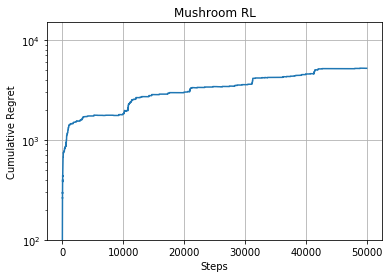

In [125]:
plt.semilogy(results['acc_regret'])
plt.ylim(100, 15000)
plt.grid()
plt.ylabel('Cumulative Regret')
plt.xlabel('Steps')
plt.title('Mushroom RL')
plt.show()

In [126]:
e = sum([random.choice((0, 5)) for i in history['label'] if i=='e'])
p = sum([random.choice((-35, 5)) for i in history['label'] if i=='p'])
uniform = e+p

In [127]:
e = sum([5 for i in history['label'] if i=='e'])
p = sum([0 for i in history['label'] if i=='p'])
oracle = e+p

In [128]:
100.0*(oracle-results['reward'].sum())/(oracle-uniform)

1.2380918400114176

In [129]:
100.0*(acc_regret)/(oracle-uniform)

1.2380918400114176

In [86]:
clf.predict_proba(sample.drop(['label', 'reward', 'action'], axis=1))[0,1]

0.01843412

In [112]:
results['acc_regret'].max()

5635